In [72]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List
import matplotlib
from scipy.ndimage import gaussian_filter1d
# plt.style.use('ggplot')
sns.set_theme(context="notebook", style="darkgrid")
sns.set(font_scale=2.5)

PROJECT_ROOT_DIR = Path().absolute().parent
PROJECT_ROOT_DIR

PosixPath('/home/sen/pythonprojects/fly-craft-examples')

In [73]:
def load_data(algo: str, filename: str, seed_str: str, insert_no: int=19, algo_dir: str="rl", smooth_success_rate: bool=True):
    df = pd.read_csv(PROJECT_ROOT_DIR / "logs" / algo_dir / filename / "progress.csv")
    df = df[pd.notnull(df["eval/success_rate"])]
    df.insert(insert_no, "seed", [seed_str] * len(df))
    df.insert(insert_no+1, "algo", [algo] * len(df))

    # 平滑！！！
    if smooth_success_rate:
        # df["eval/success_rate"] = smooth(df["eval/success_rate"], 5)
        df["eval/success_rate"] = gaussian_filter1d(df["eval/success_rate"], sigma=1)

    return df

In [74]:
def load_two_stage_data(algo: str, first_stage_filename: str,second_stage_filename:str, seed_str: str, insert_no: int=19, algo_dir: str="rl", smooth_success_rate: bool=True, time_steps_add_to_sec_stage: int=500000):
    df_first_stage = pd.read_csv(PROJECT_ROOT_DIR / "logs" / algo_dir / first_stage_filename / "progress.csv")
    df_first_stage = df_first_stage[pd.notnull(df_first_stage["eval/success_rate"])]

    df_second_stage = pd.read_csv(PROJECT_ROOT_DIR / "logs" / algo_dir / second_stage_filename / "progress.csv")
    df_second_stage = df_second_stage[pd.notnull(df_second_stage["eval/success_rate"])]

    df_second_stage["time/total_timesteps"] = df_second_stage["time/total_timesteps"] + time_steps_add_to_sec_stage
    
    merge_df = pd.concat([df_first_stage,df_second_stage],ignore_index=True)
    merge_df.insert(insert_no, "seed", [seed_str] * len(merge_df))
    merge_df.insert(insert_no+1, "algo", [algo] * len(merge_df))


    # 平滑！！！
    if smooth_success_rate:
        # df["eval/success_rate"] = smooth(df["eval/success_rate"], 5)
        merge_df["eval/success_rate"] = gaussian_filter1d(merge_df["eval/success_rate"], sigma=1)

    return merge_df

In [75]:
def load_three_stage_data(algo: str, first_stage_filename: str,second_stage_filename:str, three_stage_filename:str, seed_str: str, insert_no: int=19, algo_dir: str="rl", smooth_success_rate: bool=True, time_steps_add_to_sec_stage: int=500000):
    df_first_stage = pd.read_csv(PROJECT_ROOT_DIR / "logs" / algo_dir / first_stage_filename / "progress.csv")
    df_first_stage = df_first_stage[pd.notnull(df_first_stage["eval/success_rate"])]

    df_second_stage = pd.read_csv(PROJECT_ROOT_DIR / "logs" / algo_dir / second_stage_filename / "progress.csv")
    df_second_stage = df_second_stage[pd.notnull(df_second_stage["eval/success_rate"])]
    df_second_stage["time/total_timesteps"] = df_second_stage["time/total_timesteps"] + time_steps_add_to_sec_stage
    
    df_three_stage = pd.read_csv(PROJECT_ROOT_DIR / "logs" / algo_dir / three_stage_filename / "progress.csv")
    df_three_stage = df_three_stage[pd.notnull(df_three_stage["eval/success_rate"])]

    df_three_stage["time/total_timesteps"] = df_three_stage["time/total_timesteps"] + 2*time_steps_add_to_sec_stage

    merge_df = pd.concat([df_first_stage,df_second_stage,df_three_stage],ignore_index=True)
    merge_df.insert(insert_no, "seed", [seed_str] * len(merge_df))
    merge_df.insert(insert_no+1, "algo", [algo] * len(merge_df))


    # 平滑！！！
    if smooth_success_rate:
        # df["eval/success_rate"] = smooth(df["eval/success_rate"], 5)
        merge_df["eval/success_rate"] = gaussian_filter1d(merge_df["eval/success_rate"], sigma=1)

    return merge_df

In [76]:
SMOOTH = True

## D2D VVC medium  sac 

## one stage without reset

500
500
500
500
500


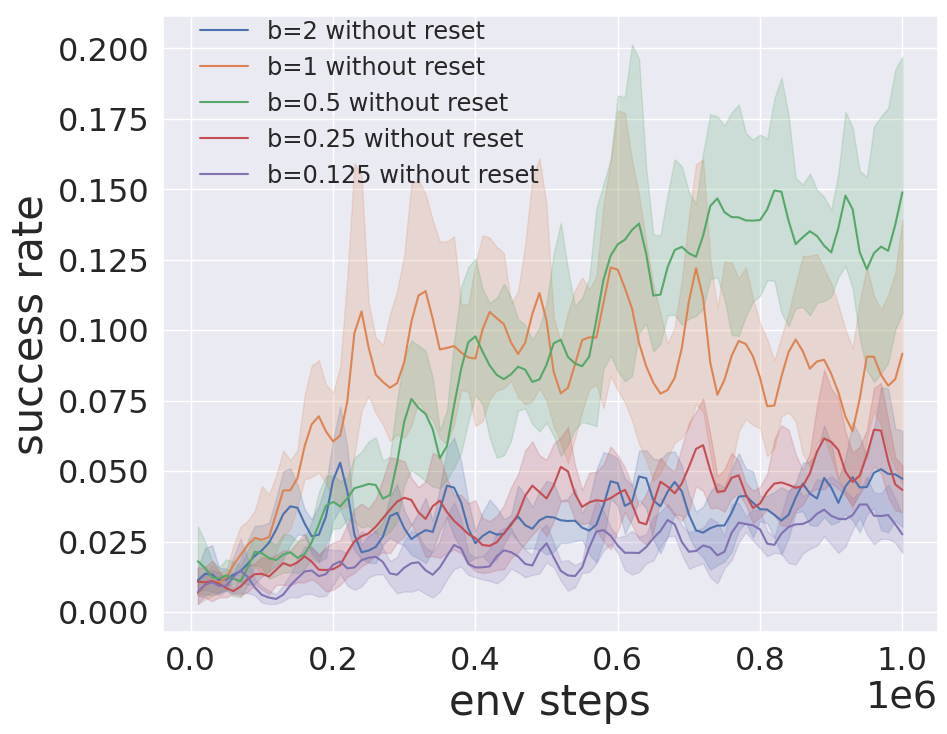

In [77]:
#  one stage without  reset
files = [
    "D2D/VVC/medium/b_2/sac_10hz_128_128_b_2_1e6steps_seed_1_singleRL", 
    "D2D/VVC/medium/b_2/sac_10hz_128_128_b_2_1e6steps_seed_2_singleRL", 
    "D2D/VVC/medium/b_2/sac_10hz_128_128_b_2_1e6steps_seed_3_singleRL",  
    "D2D/VVC/medium/b_2/sac_10hz_128_128_b_2_1e6steps_seed_4_singleRL", 
    "D2D/VVC/medium/b_2/sac_10hz_128_128_b_2_1e6steps_seed_5_singleRL", 
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b_2_without_reset = pd.concat([load_data("b=2 without reset", filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_b_2_without_reset))


files = [
    "D2D/VVC/medium/b_1/sac_10hz_128_128_b_1_1e6steps_seed_1_singleRL", 
    "D2D/VVC/medium/b_1/sac_10hz_128_128_b_1_1e6steps_seed_2_singleRL", 
    "D2D/VVC/medium/b_1/sac_10hz_128_128_b_1_1e6steps_seed_3_singleRL", 
    "D2D/VVC/medium/b_1/sac_10hz_128_128_b_1_1e6steps_seed_4_singleRL", 
    "D2D/VVC/medium/b_1/sac_10hz_128_128_b_1_1e6steps_seed_5_singleRL", 
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b_1_without_reset = pd.concat([load_data("b=1 without reset", filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_b_1_without_reset))


files = [
    "D2D/VVC/medium/b_05/sac_10hz_128_128_b_05_1e6steps_seed_1_singleRL", 
    "D2D/VVC/medium/b_05/sac_10hz_128_128_b_05_1e6steps_seed_2_singleRL", 
    "D2D/VVC/medium/b_05/sac_10hz_128_128_b_05_1e6steps_seed_3_singleRL", 
    "D2D/VVC/medium/b_05/sac_10hz_128_128_b_05_1e6steps_seed_4_singleRL", 
    "D2D/VVC/medium/b_05/sac_10hz_128_128_b_05_1e6steps_seed_5_singleRL", 
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b_05_without_reset = pd.concat([load_data("b=0.5 without reset", filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_b_05_without_reset))

files = [
    "D2D/VVC/medium/b_025/sac_10hz_128_128_b_025_1e6steps_seed_1_singleRL", 
    "D2D/VVC/medium/b_025/sac_10hz_128_128_b_025_1e6steps_seed_2_singleRL",
    "D2D/VVC/medium/b_025/sac_10hz_128_128_b_025_1e6steps_seed_3_singleRL", 
    "D2D/VVC/medium/b_025/sac_10hz_128_128_b_025_1e6steps_seed_4_singleRL", 
    "D2D/VVC/medium/b_025/sac_10hz_128_128_b_025_1e6steps_seed_5_singleRL", 

]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b_025_without_reset = pd.concat([load_data("b=0.25 without reset", filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_b_025_without_reset))


files = [
    "D2D/VVC/medium/b_0125/sac_10hz_128_128_b_0125_1e6steps_seed_1_singleRL", 
    "D2D/VVC/medium/b_0125/sac_10hz_128_128_b_0125_1e6steps_seed_2_singleRL",
    "D2D/VVC/medium/b_0125/sac_10hz_128_128_b_0125_1e6steps_seed_3_singleRL",
    "D2D/VVC/medium/b_0125/sac_10hz_128_128_b_0125_1e6steps_seed_4_singleRL", 
    "D2D/VVC/medium/b_0125/sac_10hz_128_128_b_0125_1e6steps_seed_5_singleRL",   

]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b_0125_without_reset = pd.concat([load_data("b=0.125 without reset", filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_b_0125_without_reset))


data_plot = pd.concat([
df_b_2_without_reset,
df_b_1_without_reset,
df_b_05_without_reset,
df_b_025_without_reset,
df_b_0125_without_reset
    ])

data_plot["eval/success_rate"] = data_plot["eval/success_rate"]
# 取部分数据做图
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.lineplot(x="time/total_timesteps", y="eval/success_rate", hue="algo", data=data_plot, ax=ax)

ax.tick_params(axis='both',labelsize=23)

ax.set_xlabel("env steps")
ax.set_ylabel("success rate")

# sns.move_legend(ax, "lower right", bbox_to_anchor=(.5, 0.98), ncol=7, title=None, frameon=False, fontsize="x-small") # "lower center"
sns.move_legend(ax, "upper left", bbox_to_anchor=(0.02, 1.03), ncol=1, title=None, frameon=False, fontsize="xx-small") # "lower center"


## one stage with reset 

500
500
500
500
500


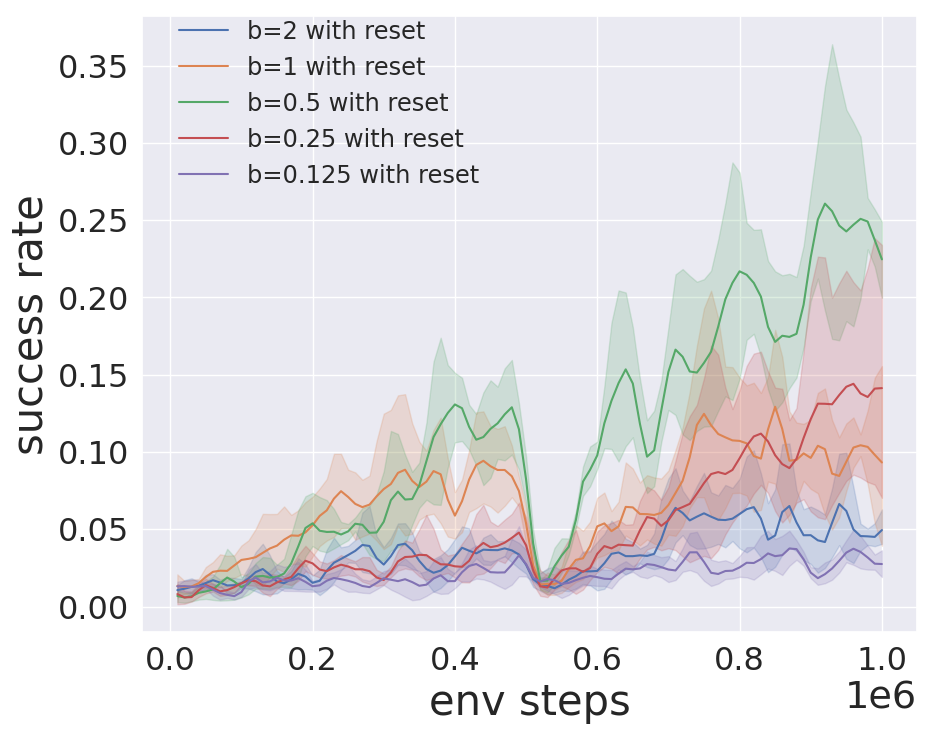

In [78]:
#  one stage with  reset

first_files = [
    "D2D/VVC/medium/baseline/two_stage_b_2_b_2/sac_10hz_128_128_b_2_5e5steps_seed_1_singleRL",
    "D2D/VVC/medium/baseline/two_stage_b_2_b_2/sac_10hz_128_128_b_2_5e5steps_seed_2_singleRL",
    "D2D/VVC/medium/baseline/two_stage_b_2_b_2/sac_10hz_128_128_b_2_5e5steps_seed_3_singleRL",
    "D2D/VVC/medium/baseline/two_stage_b_2_b_2/sac_10hz_128_128_b_2_5e5steps_seed_4_singleRL",
    "D2D/VVC/medium/baseline/two_stage_b_2_b_2/sac_10hz_128_128_b_2_5e5steps_seed_5_singleRL",
]
second_files = [
     "D2D/VVC/medium/baseline/two_stage_b_2_b_2/sac_10hz_128_128_b_2_5e5steps_b_2_5e5steps_seed_1_singleRL",
     "D2D/VVC/medium/baseline/two_stage_b_2_b_2/sac_10hz_128_128_b_2_5e5steps_b_2_5e5steps_seed_2_singleRL",
     "D2D/VVC/medium/baseline/two_stage_b_2_b_2/sac_10hz_128_128_b_2_5e5steps_b_2_5e5steps_seed_3_singleRL",
     "D2D/VVC/medium/baseline/two_stage_b_2_b_2/sac_10hz_128_128_b_2_5e5steps_b_2_5e5steps_seed_4_singleRL",
     "D2D/VVC/medium/baseline/two_stage_b_2_b_2/sac_10hz_128_128_b_2_5e5steps_b_2_5e5steps_seed_5_singleRL",

]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b_2_with_reset = pd.concat([load_two_stage_data("b=2 with reset", first_filename,second_filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH,time_steps_add_to_sec_stage=500000).iloc[::] for first_filename, second_filename,seed_str in zip(first_files, second_files, seed_strs)])
print(len(df_b_2_with_reset))



first_files = [
   "D2D/VVC/medium/baseline/two_stage_b_1_b_1/sac_10hz_128_128_b_1_5e5steps_seed_1_singleRL",
   "D2D/VVC/medium/baseline/two_stage_b_1_b_1/sac_10hz_128_128_b_1_5e5steps_seed_2_singleRL",
   "D2D/VVC/medium/baseline/two_stage_b_1_b_1/sac_10hz_128_128_b_1_5e5steps_seed_3_singleRL",
   "D2D/VVC/medium/baseline/two_stage_b_1_b_1/sac_10hz_128_128_b_1_5e5steps_seed_4_singleRL",
   "D2D/VVC/medium/baseline/two_stage_b_1_b_1/sac_10hz_128_128_b_1_5e5steps_seed_5_singleRL",
]
second_files = [
     "D2D/VVC/medium/baseline/two_stage_b_1_b_1/sac_10hz_128_128_b_1_5e5steps_b_1_5e5steps_seed_1_singleRL",
     "D2D/VVC/medium/baseline/two_stage_b_1_b_1/sac_10hz_128_128_b_1_5e5steps_b_1_5e5steps_seed_2_singleRL",
     "D2D/VVC/medium/baseline/two_stage_b_1_b_1/sac_10hz_128_128_b_1_5e5steps_b_1_5e5steps_seed_3_singleRL",
     "D2D/VVC/medium/baseline/two_stage_b_1_b_1/sac_10hz_128_128_b_1_5e5steps_b_1_5e5steps_seed_4_singleRL",
     "D2D/VVC/medium/baseline/two_stage_b_1_b_1/sac_10hz_128_128_b_1_5e5steps_b_1_5e5steps_seed_5_singleRL",
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b_1_with_reset = pd.concat([load_two_stage_data("b=1 with reset", first_filename,second_filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH,time_steps_add_to_sec_stage=500000).iloc[::] for first_filename, second_filename,seed_str in zip(first_files, second_files, seed_strs)])
print(len(df_b_1_with_reset))


first_files = [
   "D2D/VVC/medium/baseline/two_stage_b_05_b_05/sac_10hz_128_128_b_05_5e5steps_seed_1_singleRL",
   "D2D/VVC/medium/baseline/two_stage_b_05_b_05/sac_10hz_128_128_b_05_5e5steps_seed_2_singleRL",
   "D2D/VVC/medium/baseline/two_stage_b_05_b_05/sac_10hz_128_128_b_05_5e5steps_seed_3_singleRL",
   "D2D/VVC/medium/baseline/two_stage_b_05_b_05/sac_10hz_128_128_b_05_5e5steps_seed_4_singleRL",
   "D2D/VVC/medium/baseline/two_stage_b_05_b_05/sac_10hz_128_128_b_05_5e5steps_seed_5_singleRL",

]
second_files = [
     "D2D/VVC/medium/baseline/two_stage_b_05_b_05/sac_10hz_128_128_b_05_5e5steps_b_05_5e5steps_seed_1_singleRL",
     "D2D/VVC/medium/baseline/two_stage_b_05_b_05/sac_10hz_128_128_b_05_5e5steps_b_05_5e5steps_seed_2_singleRL",
     "D2D/VVC/medium/baseline/two_stage_b_05_b_05/sac_10hz_128_128_b_05_5e5steps_b_05_5e5steps_seed_3_singleRL",
     "D2D/VVC/medium/baseline/two_stage_b_05_b_05/sac_10hz_128_128_b_05_5e5steps_b_05_5e5steps_seed_4_singleRL",
     "D2D/VVC/medium/baseline/two_stage_b_05_b_05/sac_10hz_128_128_b_05_5e5steps_b_05_5e5steps_seed_5_singleRL",

]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b_05_with_reset = pd.concat([load_two_stage_data("b=0.5 with reset", first_filename,second_filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH,time_steps_add_to_sec_stage=500000).iloc[::] for first_filename, second_filename,seed_str in zip(first_files, second_files, seed_strs)])
print(len(df_b_05_with_reset))


first_files = [
   "D2D/VVC/medium/baseline/two_stage_b_025_b_025/sac_10hz_128_128_b_025_5e5steps_seed_1_singleRL",
   "D2D/VVC/medium/baseline/two_stage_b_025_b_025/sac_10hz_128_128_b_025_5e5steps_seed_2_singleRL",
   "D2D/VVC/medium/baseline/two_stage_b_025_b_025/sac_10hz_128_128_b_025_5e5steps_seed_3_singleRL",
   "D2D/VVC/medium/baseline/two_stage_b_025_b_025/sac_10hz_128_128_b_025_5e5steps_seed_4_singleRL",
   "D2D/VVC/medium/baseline/two_stage_b_025_b_025/sac_10hz_128_128_b_025_5e5steps_seed_5_singleRL",

]
second_files = [
     "D2D/VVC/medium/baseline/two_stage_b_025_b_025/sac_10hz_128_128_b_025_5e5steps_b_025_5e5steps_seed_1_singleRL",
     "D2D/VVC/medium/baseline/two_stage_b_025_b_025/sac_10hz_128_128_b_025_5e5steps_b_025_5e5steps_seed_2_singleRL",
     "D2D/VVC/medium/baseline/two_stage_b_025_b_025/sac_10hz_128_128_b_025_5e5steps_b_025_5e5steps_seed_3_singleRL",
     "D2D/VVC/medium/baseline/two_stage_b_025_b_025/sac_10hz_128_128_b_025_5e5steps_b_025_5e5steps_seed_4_singleRL",
     "D2D/VVC/medium/baseline/two_stage_b_025_b_025/sac_10hz_128_128_b_025_5e5steps_b_025_5e5steps_seed_5_singleRL",

]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b_025_with_reset = pd.concat([load_two_stage_data("b=0.25 with reset", first_filename,second_filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH,time_steps_add_to_sec_stage=500000).iloc[::] for first_filename, second_filename,seed_str in zip(first_files, second_files, seed_strs)])
print(len(df_b_025_with_reset))

first_files = [
   "D2D/VVC/medium/baseline/two_stage_b_0125_b_0125/sac_10hz_128_128_b_0125_5e5steps_seed_1_singleRL",
   "D2D/VVC/medium/baseline/two_stage_b_0125_b_0125/sac_10hz_128_128_b_0125_5e5steps_seed_2_singleRL",
   "D2D/VVC/medium/baseline/two_stage_b_0125_b_0125/sac_10hz_128_128_b_0125_5e5steps_seed_3_singleRL",
   "D2D/VVC/medium/baseline/two_stage_b_0125_b_0125/sac_10hz_128_128_b_0125_5e5steps_seed_4_singleRL",
   "D2D/VVC/medium/baseline/two_stage_b_0125_b_0125/sac_10hz_128_128_b_0125_5e5steps_seed_5_singleRL",

]
second_files = [
     "D2D/VVC/medium/baseline/two_stage_b_0125_b_0125/sac_10hz_128_128_b_0125_5e5steps_b_0125_5e5steps_seed_1_singleRL",
     "D2D/VVC/medium/baseline/two_stage_b_0125_b_0125/sac_10hz_128_128_b_0125_5e5steps_b_0125_5e5steps_seed_2_singleRL",
     "D2D/VVC/medium/baseline/two_stage_b_0125_b_0125/sac_10hz_128_128_b_0125_5e5steps_b_0125_5e5steps_seed_3_singleRL",
     "D2D/VVC/medium/baseline/two_stage_b_0125_b_0125/sac_10hz_128_128_b_0125_5e5steps_b_0125_5e5steps_seed_4_singleRL",
     "D2D/VVC/medium/baseline/two_stage_b_0125_b_0125/sac_10hz_128_128_b_0125_5e5steps_b_0125_5e5steps_seed_5_singleRL",


]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b_0125_with_reset = pd.concat([load_two_stage_data("b=0.125 with reset", first_filename,second_filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH,time_steps_add_to_sec_stage=500000).iloc[::] for first_filename, second_filename,seed_str in zip(first_files, second_files, seed_strs)])
print(len(df_b_0125_with_reset))


data_plot = pd.concat([
df_b_2_with_reset,
df_b_1_with_reset,
df_b_05_with_reset,
df_b_025_with_reset,
df_b_0125_with_reset
    ])

data_plot["eval/success_rate"] = data_plot["eval/success_rate"]
# 取部分数据做图
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.lineplot(x="time/total_timesteps", y="eval/success_rate", hue="algo", data=data_plot, ax=ax)

ax.tick_params(axis='both',labelsize=23)

ax.set_xlabel("env steps")
ax.set_ylabel("success rate")

# sns.move_legend(ax, "lower right", bbox_to_anchor=(.5, 0.98), ncol=7, title=None, frameon=False, fontsize="x-small") # "lower center"
sns.move_legend(ax, "upper left", bbox_to_anchor=(0.02, 1.03), ncol=1, title=None, frameon=False, fontsize="xx-small") # "lower center"

## one stage with & without reset

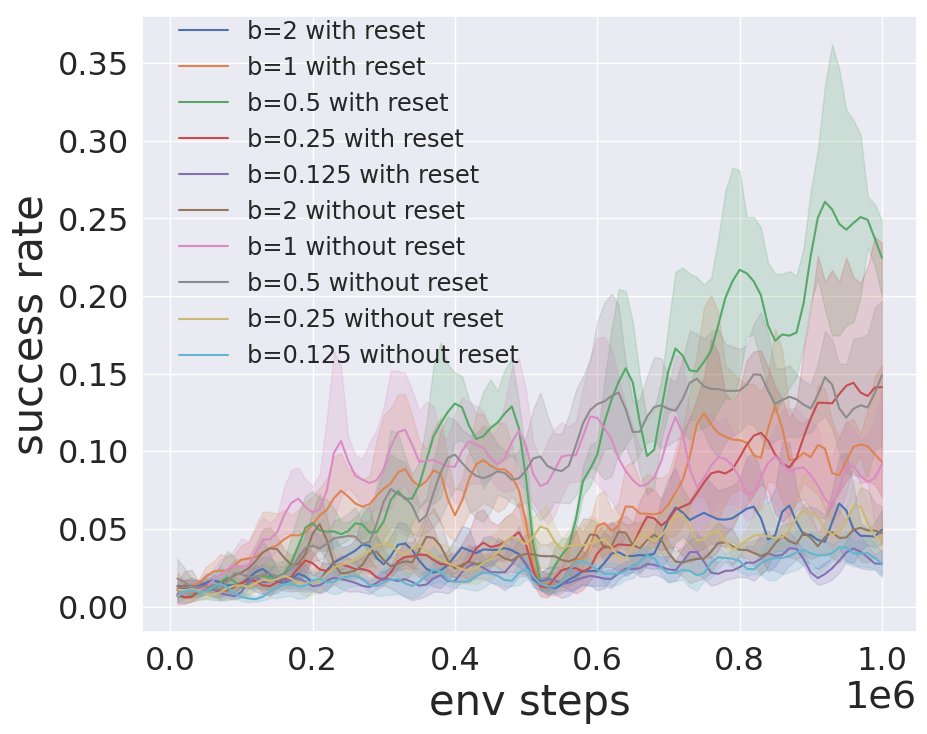

In [79]:

data_plot = pd.concat([
df_b_2_with_reset,
df_b_1_with_reset,
df_b_05_with_reset,
df_b_025_with_reset,
df_b_0125_with_reset,
df_b_2_without_reset,
df_b_1_without_reset,
df_b_05_without_reset,
df_b_025_without_reset,
df_b_0125_without_reset
    ])

data_plot["eval/success_rate"] = data_plot["eval/success_rate"]
# 取部分数据做图
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.lineplot(x="time/total_timesteps", y="eval/success_rate", hue="algo", data=data_plot, ax=ax)

ax.tick_params(axis='both',labelsize=23)

ax.set_xlabel("env steps")
ax.set_ylabel("success rate")

# sns.move_legend(ax, "lower right", bbox_to_anchor=(.5, 0.98), ncol=7, title=None, frameon=False, fontsize="x-small") # "lower center"
sns.move_legend(ax, "upper left", bbox_to_anchor=(0.02, 1.03), ncol=1, title=None, frameon=False, fontsize="xx-small") # "lower center"

## two stage D2D

500
500
750
500
500


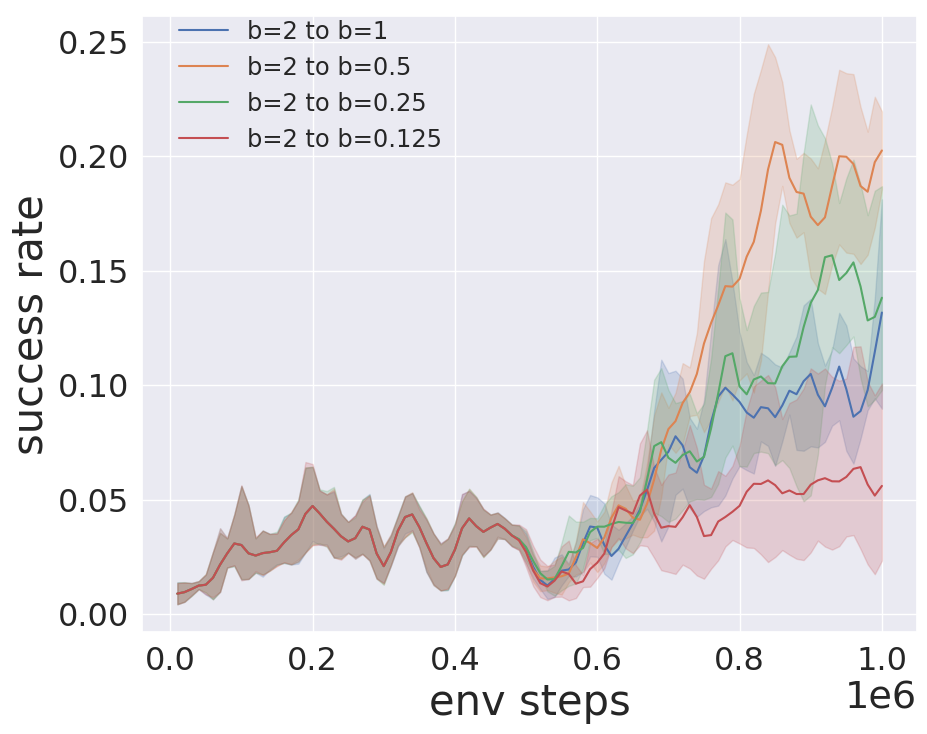

In [80]:

first_files = [
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_1_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_2_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_3_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_4_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_5_singleRL",
]
second_files = [
    "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_b_05_5e5steps_seed_1_singleRL", 
    "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_b_05_5e5steps_seed_2_singleRL",
    "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_b_05_5e5steps_seed_3_singleRL", 
    "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_b_05_5e5steps_seed_4_singleRL", 
    "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_b_05_5e5steps_seed_5_singleRL",  
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_two_stage_b_2_b05 = pd.concat([load_two_stage_data("b=2 to b=0.5", first_filename,second_filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH,time_steps_add_to_sec_stage=500000).iloc[::] for first_filename, second_filename,seed_str in zip(first_files, second_files, seed_strs)])
print(len(df_two_stage_b_2_b05))


first_files = [
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_1_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_2_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_3_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_4_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_5_singleRL",
]
second_files = [
    "D2D/VVC/medium/two_stage_b_2_b_1/sac_10hz_128_128_b_2_5e5steps_b_1_5e5steps_seed_1_singleRL", 
    "D2D/VVC/medium/two_stage_b_2_b_1/sac_10hz_128_128_b_2_5e5steps_b_1_5e5steps_seed_2_singleRL", 
    "D2D/VVC/medium/two_stage_b_2_b_1/sac_10hz_128_128_b_2_5e5steps_b_1_5e5steps_seed_3_singleRL",
    "D2D/VVC/medium/two_stage_b_2_b_1/sac_10hz_128_128_b_2_5e5steps_b_1_5e5steps_seed_4_singleRL", 
    "D2D/VVC/medium/two_stage_b_2_b_1/sac_10hz_128_128_b_2_5e5steps_b_1_5e5steps_seed_5_singleRL",   
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_two_stage_b_2_b1 = pd.concat([load_two_stage_data("b=2 to b=1", first_filename,second_filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH,time_steps_add_to_sec_stage=500000).iloc[::] for first_filename, second_filename,seed_str in zip(first_files, second_files, seed_strs)])
print(len(df_two_stage_b_2_b1))


first_files = [
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_1_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_2_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_3_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_4_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_5_singleRL",
]
second_files = [
    "D2D/VVC/medium/two_stage_b_2_b_1/sac_10hz_128_128_b_2_5e5steps_b_1_1e6steps_seed_1_singleRL", 
    "D2D/VVC/medium/two_stage_b_2_b_1/sac_10hz_128_128_b_2_5e5steps_b_1_1e6steps_seed_2_singleRL", 
    "D2D/VVC/medium/two_stage_b_2_b_1/sac_10hz_128_128_b_2_5e5steps_b_1_1e6steps_seed_3_singleRL", 
    "D2D/VVC/medium/two_stage_b_2_b_1/sac_10hz_128_128_b_2_5e5steps_b_1_1e6steps_seed_4_singleRL", 
    "D2D/VVC/medium/two_stage_b_2_b_1/sac_10hz_128_128_b_2_5e5steps_b_1_1e6steps_seed_5_singleRL", 
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_two_stage_b_2_b1_1e6 = pd.concat([load_two_stage_data("b=2 to b=1 (1e6) ", first_filename,second_filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH,time_steps_add_to_sec_stage=500000).iloc[::] for first_filename, second_filename,seed_str in zip(first_files, second_files, seed_strs)])
print(len(df_two_stage_b_2_b1_1e6))



first_files = [
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_1_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_2_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_3_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_4_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_5_singleRL",
]
second_files = [
    "D2D/VVC/medium/two_stage_b_2_b_025/sac_10hz_128_128_b_2_5e5steps_b_025_5e5steps_seed_1_singleRL", 
    "D2D/VVC/medium/two_stage_b_2_b_025/sac_10hz_128_128_b_2_5e5steps_b_025_5e5steps_seed_2_singleRL", 
    "D2D/VVC/medium/two_stage_b_2_b_025/sac_10hz_128_128_b_2_5e5steps_b_025_5e5steps_seed_3_singleRL",
    "D2D/VVC/medium/two_stage_b_2_b_025/sac_10hz_128_128_b_2_5e5steps_b_025_5e5steps_seed_4_singleRL", 
    "D2D/VVC/medium/two_stage_b_2_b_025/sac_10hz_128_128_b_2_5e5steps_b_025_5e5steps_seed_5_singleRL",   
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_two_stage_b_2_b025 = pd.concat([load_two_stage_data("b=2 to b=0.25", first_filename,second_filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH,time_steps_add_to_sec_stage=500000).iloc[::] for first_filename, second_filename,seed_str in zip(first_files, second_files, seed_strs)])
print(len(df_two_stage_b_2_b025))


first_files = [
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_1_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_2_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_3_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_4_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_5_singleRL",
]
second_files = [
    "D2D/VVC/medium/two_stage_b_2_b_0125/sac_10hz_128_128_b_2_5e5steps_b_0125_5e5steps_seed_1_singleRL", 
    "D2D/VVC/medium/two_stage_b_2_b_0125/sac_10hz_128_128_b_2_5e5steps_b_0125_5e5steps_seed_2_singleRL", 
    "D2D/VVC/medium/two_stage_b_2_b_0125/sac_10hz_128_128_b_2_5e5steps_b_0125_5e5steps_seed_3_singleRL",
    "D2D/VVC/medium/two_stage_b_2_b_0125/sac_10hz_128_128_b_2_5e5steps_b_0125_5e5steps_seed_4_singleRL", 
    "D2D/VVC/medium/two_stage_b_2_b_0125/sac_10hz_128_128_b_2_5e5steps_b_0125_5e5steps_seed_5_singleRL",   
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_two_stage_b_2_b0125 = pd.concat([load_two_stage_data("b=2 to b=0.125", first_filename,second_filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH,time_steps_add_to_sec_stage=500000).iloc[::] for first_filename, second_filename,seed_str in zip(first_files, second_files, seed_strs)])
print(len(df_two_stage_b_2_b0125))



data_plot = pd.concat([
df_two_stage_b_2_b1,
# df_two_stage_b_2_b1_1e6,
df_two_stage_b_2_b05,
df_two_stage_b_2_b025,
df_two_stage_b_2_b0125
    ])

data_plot["eval/success_rate"] = data_plot["eval/success_rate"]
# 取部分数据做图
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.lineplot(x="time/total_timesteps", y="eval/success_rate", hue="algo", data=data_plot, ax=ax)

ax.tick_params(axis='both',labelsize=23)

ax.set_xlabel("env steps")
ax.set_ylabel("success rate")

# sns.move_legend(ax, "lower right", bbox_to_anchor=(.5, 0.98), ncol=7, title=None, frameon=False, fontsize="x-small") # "lower center"
sns.move_legend(ax, "upper left", bbox_to_anchor=(0.02, 1.03), ncol=1, title=None, frameon=False, fontsize="xx-small") # "lower center"

## two stage hard sac b = 2 to b = 0.5

1000


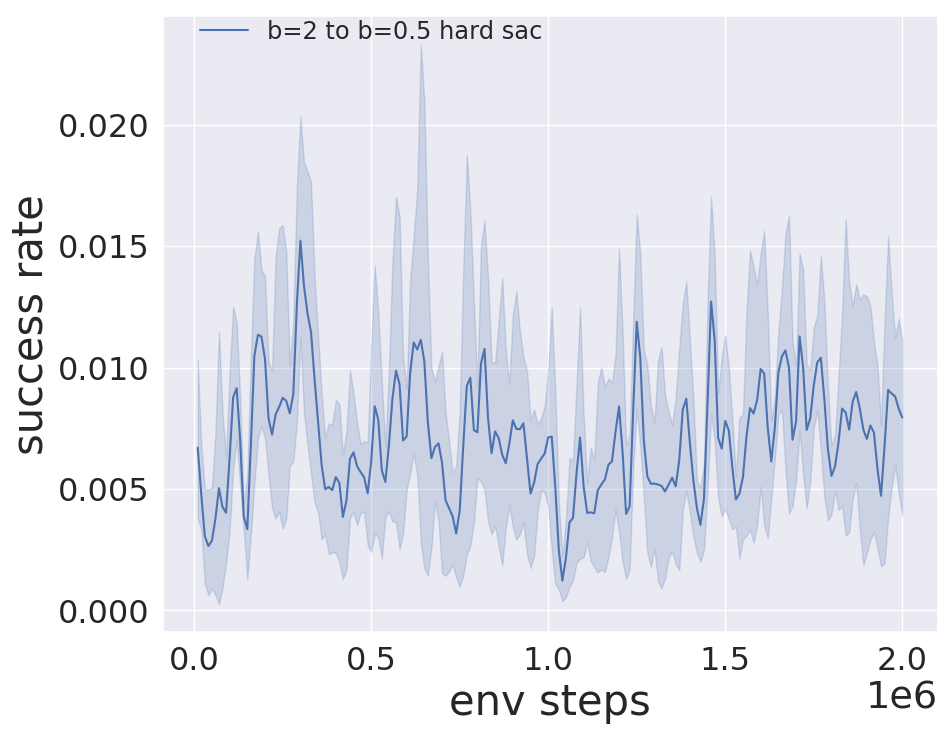

In [101]:
first_files = [
   "D2D/VVC/hard_sac/two_satge_hard_sac_b_2_b05/sac_her_10hz_128_128_b_2_1e6steps_seed_1_singleRL",
   "D2D/VVC/hard_sac/two_satge_hard_sac_b_2_b05/sac_her_10hz_128_128_b_2_1e6steps_seed_2_singleRL",
   "D2D/VVC/hard_sac/two_satge_hard_sac_b_2_b05/sac_her_10hz_128_128_b_2_1e6steps_seed_3_singleRL",
   "D2D/VVC/hard_sac/two_satge_hard_sac_b_2_b05/sac_her_10hz_128_128_b_2_1e6steps_seed_4_singleRL",
   "D2D/VVC/hard_sac/two_satge_hard_sac_b_2_b05/sac_her_10hz_128_128_b_2_1e6steps_seed_5_singleRL",

]
second_files = [
    "D2D/VVC/hard_sac/two_satge_hard_sac_b_2_b05/sac_her_10hz_128_128_b_2_1e6steps_b_05_1e6steps_seed_1_singleRL", 
    "D2D/VVC/hard_sac/two_satge_hard_sac_b_2_b05/sac_her_10hz_128_128_b_2_1e6steps_b_05_1e6steps_seed_2_singleRL", 
    "D2D/VVC/hard_sac/two_satge_hard_sac_b_2_b05/sac_her_10hz_128_128_b_2_1e6steps_b_05_1e6steps_seed_3_singleRL", 
    "D2D/VVC/hard_sac/two_satge_hard_sac_b_2_b05/sac_her_10hz_128_128_b_2_1e6steps_b_05_1e6steps_seed_4_singleRL", 
    "D2D/VVC/hard_sac/two_satge_hard_sac_b_2_b05/sac_her_10hz_128_128_b_2_1e6steps_b_05_1e6steps_seed_5_singleRL", 
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_two_stage_b_2_b05_hard_sac = pd.concat([load_two_stage_data("b=2 to b=0.5 hard sac", first_filename,second_filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH,time_steps_add_to_sec_stage=1000000).iloc[::] for first_filename, second_filename,seed_str in zip(first_files, second_files, seed_strs)])
print(len(df_two_stage_b_2_b05_hard_sac))



data_plot = pd.concat([
df_two_stage_b_2_b05_hard_sac,

    ])

data_plot["eval/success_rate"] = data_plot["eval/success_rate"]
# 取部分数据做图
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.lineplot(x="time/total_timesteps", y="eval/success_rate", hue="algo", data=data_plot, ax=ax)

ax.tick_params(axis='both',labelsize=23)

ax.set_xlabel("env steps")
ax.set_ylabel("success rate")

# sns.move_legend(ax, "lower right", bbox_to_anchor=(.5, 0.98), ncol=7, title=None, frameon=False, fontsize="x-small") # "lower center"
sns.move_legend(ax, "upper left", bbox_to_anchor=(0.02, 1.03), ncol=1, title=None, frameon=False, fontsize="xx-small") # "lower center"

## compare one stage with two stage

### b = 1

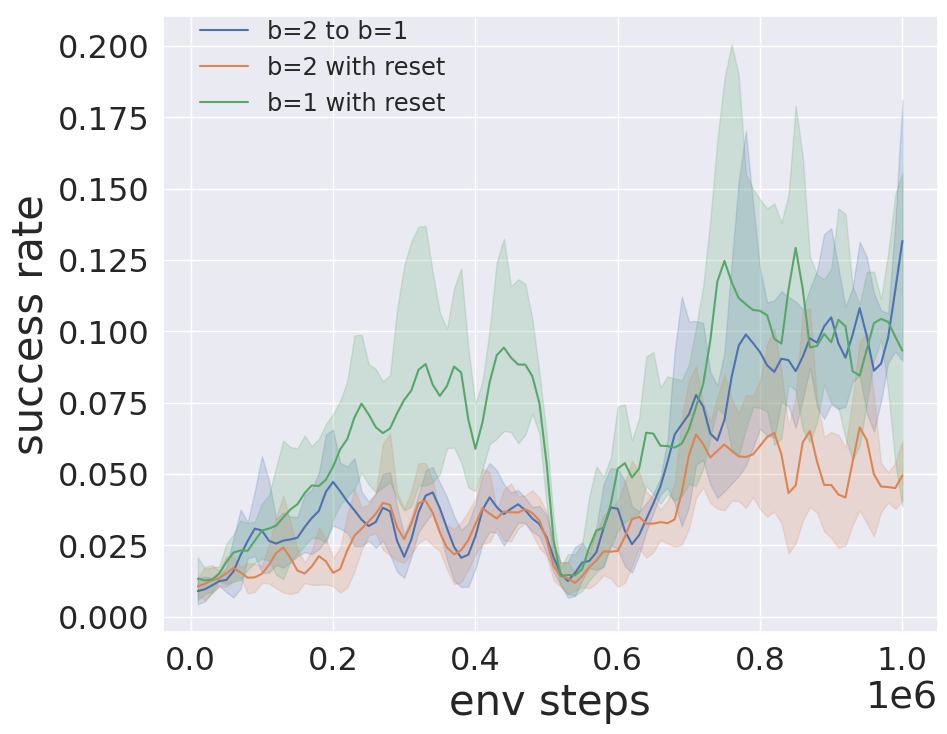

In [81]:

data_plot = pd.concat([
df_two_stage_b_2_b1,
df_b_2_with_reset,
df_b_1_with_reset,
# df_b_2_without_reset,
# df_b_1_without_reset,


    ])

data_plot["eval/success_rate"] = data_plot["eval/success_rate"]
# 取部分数据做图
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.lineplot(x="time/total_timesteps", y="eval/success_rate", hue="algo", data=data_plot, ax=ax)

ax.tick_params(axis='both',labelsize=23)

ax.set_xlabel("env steps")
ax.set_ylabel("success rate")

# sns.move_legend(ax, "lower right", bbox_to_anchor=(.5, 0.98), ncol=7, title=None, frameon=False, fontsize="x-small") # "lower center"
sns.move_legend(ax, "upper left", bbox_to_anchor=(0.02, 1.03), ncol=1, title=None, frameon=False, fontsize="xx-small") # "lower center"

# df_b_2_with_reset,
# df_b_1_with_reset,
# df_b_05_with_reset,
# df_b_025_with_reset,
# df_b_2_without_reset,
# df_b_1_without_reset,
# df_b_05_without_reset,
# df_b_025_without_reset,
# df_b_0125_without_reset

### b = 0.5

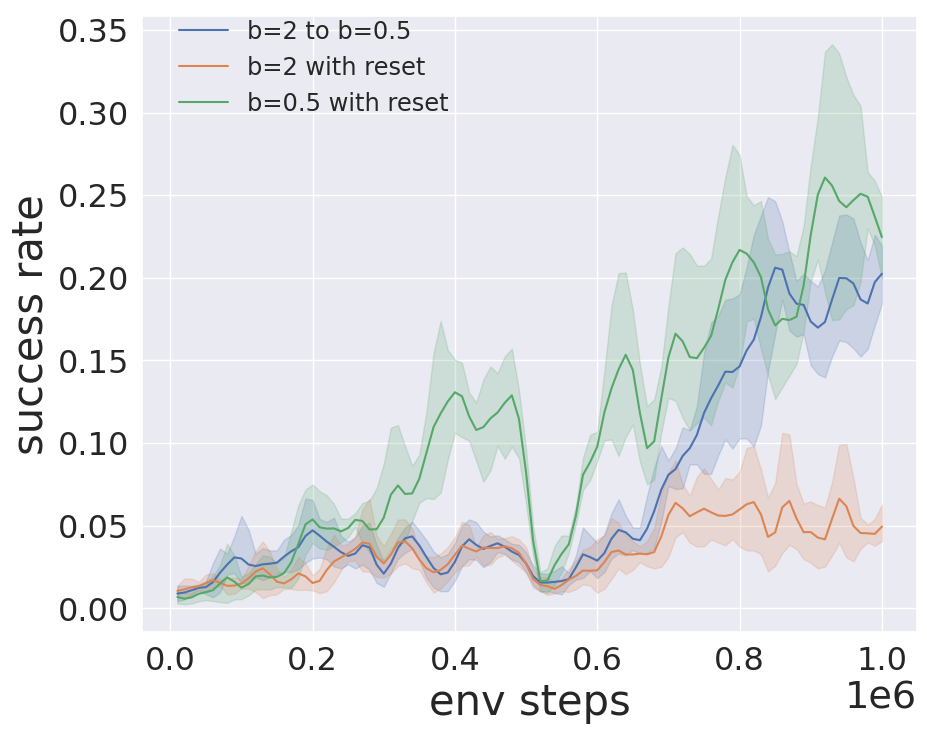

In [82]:
data_plot = pd.concat([
df_two_stage_b_2_b05,
df_b_2_with_reset,
df_b_05_with_reset,
# df_b_2_without_reset,
# df_b_05_without_reset,

    ])

data_plot["eval/success_rate"] = data_plot["eval/success_rate"]
# 取部分数据做图
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.lineplot(x="time/total_timesteps", y="eval/success_rate", hue="algo", data=data_plot, ax=ax)

ax.tick_params(axis='both',labelsize=23)

ax.set_xlabel("env steps")
ax.set_ylabel("success rate")

# sns.move_legend(ax, "lower right", bbox_to_anchor=(.5, 0.98), ncol=7, title=None, frameon=False, fontsize="x-small") # "lower center"
sns.move_legend(ax, "upper left", bbox_to_anchor=(0.02, 1.03), ncol=1, title=None, frameon=False, fontsize="xx-small") # "lower center"

# df_b_2_with_reset,
# df_b_1_with_reset,
# df_b_05_with_reset,
# df_b_025_with_reset,
# df_b_2_without_reset,
# df_b_1_without_reset,
# df_b_05_without_reset,
# df_b_025_without_reset,
# df_b_0125_without_reset

### b= 0.25

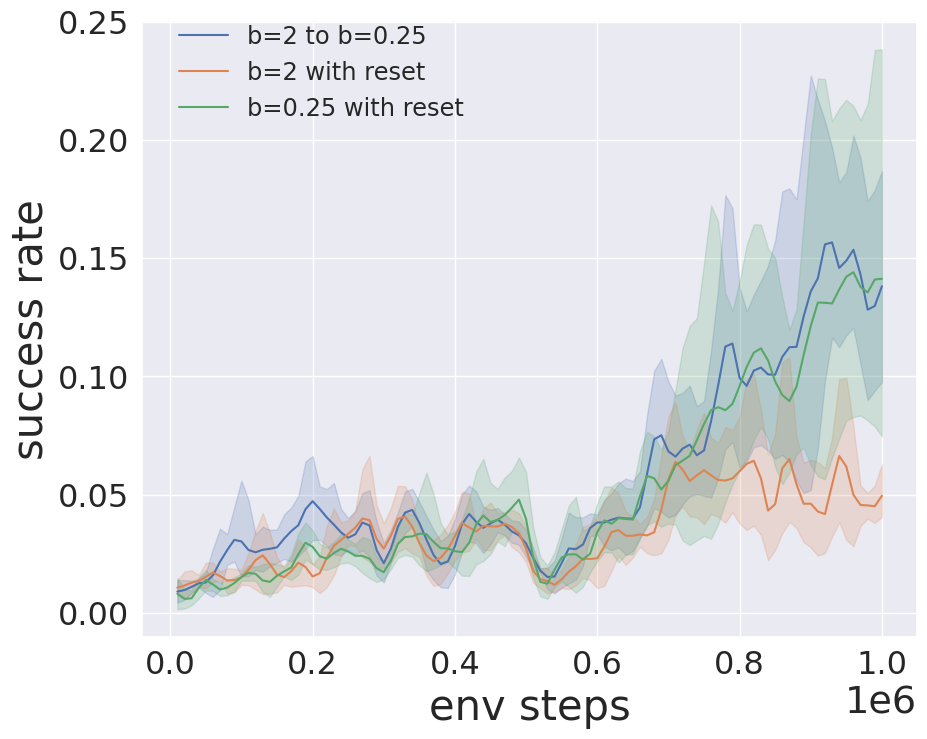

In [83]:
data_plot = pd.concat([
df_two_stage_b_2_b025,
df_b_2_with_reset,
df_b_025_with_reset,
# df_b_2_without_reset,
# df_b_025_without_reset,

    ])

data_plot["eval/success_rate"] = data_plot["eval/success_rate"]
# 取部分数据做图
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.lineplot(x="time/total_timesteps", y="eval/success_rate", hue="algo", data=data_plot, ax=ax)

ax.tick_params(axis='both',labelsize=23)

ax.set_xlabel("env steps")
ax.set_ylabel("success rate")

# sns.move_legend(ax, "lower right", bbox_to_anchor=(.5, 0.98), ncol=7, title=None, frameon=False, fontsize="x-small") # "lower center"
sns.move_legend(ax, "upper left", bbox_to_anchor=(0.02, 1.03), ncol=1, title=None, frameon=False, fontsize="xx-small") # "lower center"

# df_b_2_with_reset,
# df_b_1_with_reset,
# df_b_05_with_reset,
# df_b_025_with_reset,
# df_b_2_without_reset,
# df_b_1_without_reset,
# df_b_05_without_reset,
# df_b_025_without_reset,
# df_b_0125_without_reset

## b = 0.125

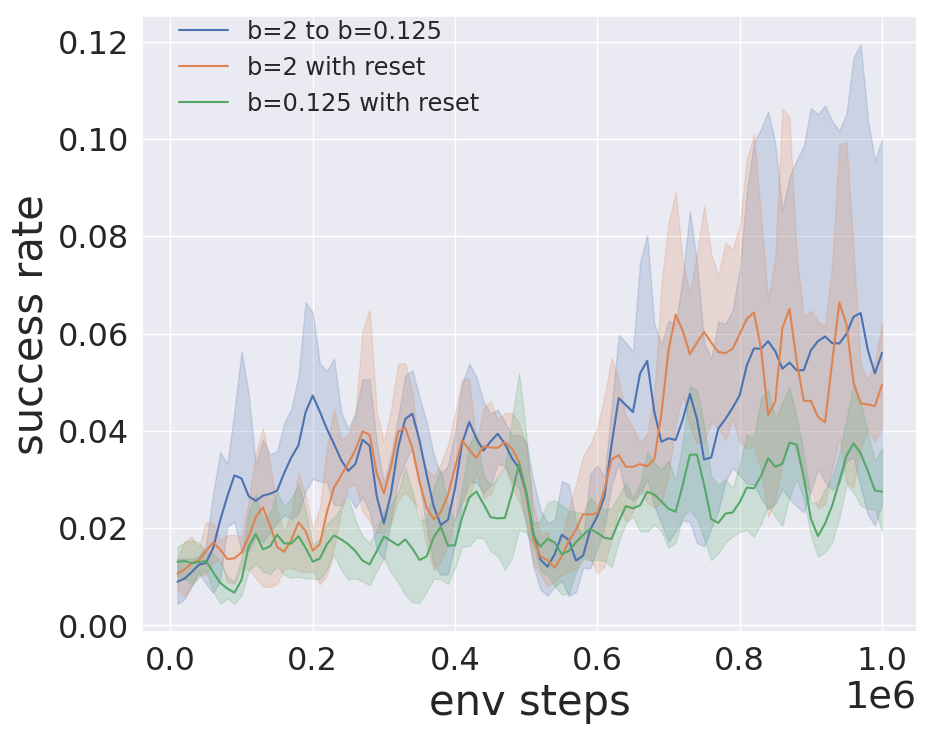

In [84]:
data_plot = pd.concat([
df_two_stage_b_2_b0125,
df_b_2_with_reset,
df_b_0125_with_reset,
# df_b_2_without_reset,
# df_b_0125_without_reset,

    ])

data_plot["eval/success_rate"] = data_plot["eval/success_rate"]
# 取部分数据做图
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.lineplot(x="time/total_timesteps", y="eval/success_rate", hue="algo", data=data_plot, ax=ax)

ax.tick_params(axis='both',labelsize=23)

ax.set_xlabel("env steps")
ax.set_ylabel("success rate")

# sns.move_legend(ax, "lower right", bbox_to_anchor=(.5, 0.98), ncol=7, title=None, frameon=False, fontsize="x-small") # "lower center"
sns.move_legend(ax, "upper left", bbox_to_anchor=(0.02, 1.03), ncol=1, title=None, frameon=False, fontsize="xx-small") # "lower center"

## two stage b = 1 to b = 0.5

500


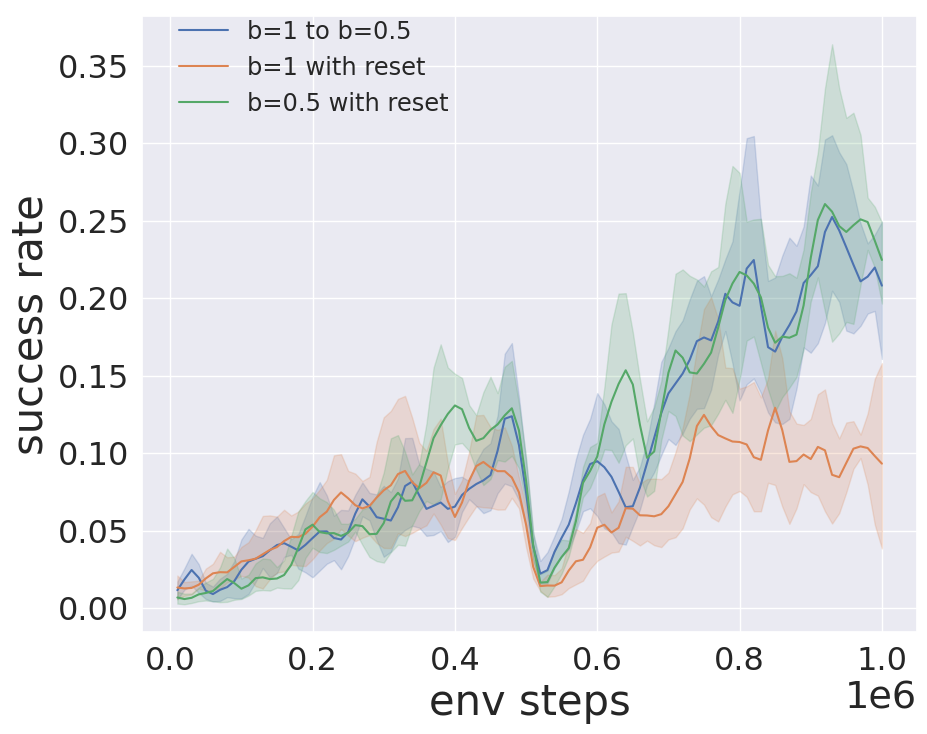

In [85]:
first_files = [
   "D2D/VVC/medium/two_stage_b_1_b_05/sac_10hz_128_128_b_1_5e5steps_seed_1_singleRL",
   "D2D/VVC/medium/two_stage_b_1_b_05/sac_10hz_128_128_b_1_5e5steps_seed_2_singleRL",
   "D2D/VVC/medium/two_stage_b_1_b_05/sac_10hz_128_128_b_1_5e5steps_seed_3_singleRL",
   "D2D/VVC/medium/two_stage_b_1_b_05/sac_10hz_128_128_b_1_5e5steps_seed_4_singleRL",
   "D2D/VVC/medium/two_stage_b_1_b_05/sac_10hz_128_128_b_1_5e5steps_seed_5_singleRL",

]
second_files = [
    "D2D/VVC/medium/two_stage_b_1_b_05/sac_10hz_128_128_b_1_5e5steps_b_05_5e5steps_seed_1_singleRL",
    "D2D/VVC/medium/two_stage_b_1_b_05/sac_10hz_128_128_b_1_5e5steps_b_05_5e5steps_seed_2_singleRL", 
    "D2D/VVC/medium/two_stage_b_1_b_05/sac_10hz_128_128_b_1_5e5steps_b_05_5e5steps_seed_3_singleRL", 
    "D2D/VVC/medium/two_stage_b_1_b_05/sac_10hz_128_128_b_1_5e5steps_b_05_5e5steps_seed_4_singleRL", 
    "D2D/VVC/medium/two_stage_b_1_b_05/sac_10hz_128_128_b_1_5e5steps_b_05_5e5steps_seed_5_singleRL",  

]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_two_stage_b_1_b05 = pd.concat([load_two_stage_data("b=1 to b=0.5", first_filename,second_filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH,time_steps_add_to_sec_stage=500000).iloc[::] for first_filename, second_filename,seed_str in zip(first_files, second_files, seed_strs)])
print(len(df_two_stage_b_1_b05))

data_plot = pd.concat([
df_two_stage_b_1_b05,
df_b_1_with_reset,
df_b_05_with_reset,
#df_b_05_without_reset
# df_b_2_without_reset,
# df_b_05_without_reset,

    ])

data_plot["eval/success_rate"] = data_plot["eval/success_rate"]
# 取部分数据做图
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.lineplot(x="time/total_timesteps", y="eval/success_rate", hue="algo", data=data_plot, ax=ax)

ax.tick_params(axis='both',labelsize=23)

ax.set_xlabel("env steps")
ax.set_ylabel("success rate")

# sns.move_legend(ax, "lower right", bbox_to_anchor=(.5, 0.98), ncol=7, title=None, frameon=False, fontsize="x-small") # "lower center"
sns.move_legend(ax, "upper left", bbox_to_anchor=(0.02, 1.03), ncol=1, title=None, frameon=False, fontsize="xx-small") # "lower center"


## two stage b = 1 to b = 0.25

500


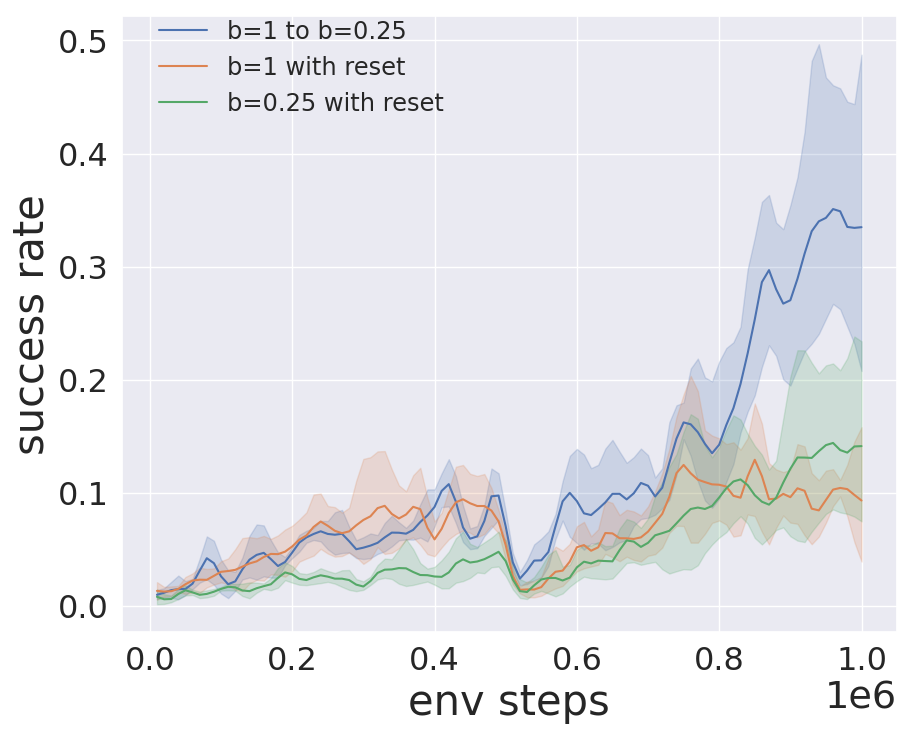

In [86]:
first_files = [
   "D2D/VVC/medium/two_stage_b_1_b_025/sac_10hz_128_128_b_1_5e5steps_seed_1_singleRL",
   "D2D/VVC/medium/two_stage_b_1_b_025/sac_10hz_128_128_b_1_5e5steps_seed_2_singleRL",
   "D2D/VVC/medium/two_stage_b_1_b_025/sac_10hz_128_128_b_1_5e5steps_seed_3_singleRL",
   "D2D/VVC/medium/two_stage_b_1_b_025/sac_10hz_128_128_b_1_5e5steps_seed_4_singleRL",
   "D2D/VVC/medium/two_stage_b_1_b_025/sac_10hz_128_128_b_1_5e5steps_seed_5_singleRL",


]
second_files = [
    "D2D/VVC/medium/two_stage_b_1_b_025/sac_10hz_128_128_b_1_5e5steps_b_025_5e5steps_seed_1_singleRL",
    "D2D/VVC/medium/two_stage_b_1_b_025/sac_10hz_128_128_b_1_5e5steps_b_025_5e5steps_seed_2_singleRL",
    "D2D/VVC/medium/two_stage_b_1_b_025/sac_10hz_128_128_b_1_5e5steps_b_025_5e5steps_seed_3_singleRL",
    "D2D/VVC/medium/two_stage_b_1_b_025/sac_10hz_128_128_b_1_5e5steps_b_025_5e5steps_seed_4_singleRL",
    "D2D/VVC/medium/two_stage_b_1_b_025/sac_10hz_128_128_b_1_5e5steps_b_025_5e5steps_seed_5_singleRL",
  

]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_two_stage_b_1_b025 = pd.concat([load_two_stage_data("b=1 to b=0.25", first_filename,second_filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH,time_steps_add_to_sec_stage=500000).iloc[::] for first_filename, second_filename,seed_str in zip(first_files, second_files, seed_strs)])
print(len(df_two_stage_b_1_b025))

data_plot = pd.concat([
df_two_stage_b_1_b025,
df_b_1_with_reset,
df_b_025_with_reset,
# df_b_025_without_reset
# df_b_2_without_reset,
# df_b_05_without_reset,

    ])

data_plot["eval/success_rate"] = data_plot["eval/success_rate"]
# 取部分数据做图
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.lineplot(x="time/total_timesteps", y="eval/success_rate", hue="algo", data=data_plot, ax=ax)

ax.tick_params(axis='both',labelsize=23)

ax.set_xlabel("env steps")
ax.set_ylabel("success rate")

# sns.move_legend(ax, "lower right", bbox_to_anchor=(.5, 0.98), ncol=7, title=None, frameon=False, fontsize="x-small") # "lower center"
sns.move_legend(ax, "upper left", bbox_to_anchor=(0.02, 1.03), ncol=1, title=None, frameon=False, fontsize="xx-small") # "lower center"


## two stage b = 1 to b = 0.125

500


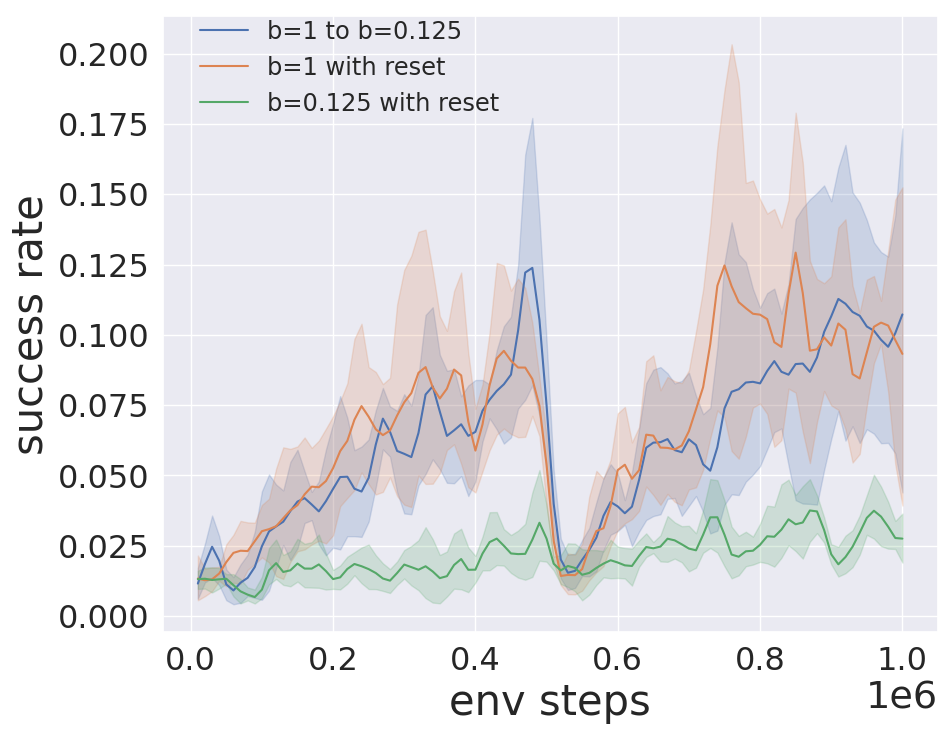

In [87]:
first_files = [
   "D2D/VVC/medium/two_stage_b_1_b_05/sac_10hz_128_128_b_1_5e5steps_seed_1_singleRL",
   "D2D/VVC/medium/two_stage_b_1_b_05/sac_10hz_128_128_b_1_5e5steps_seed_2_singleRL",
   "D2D/VVC/medium/two_stage_b_1_b_05/sac_10hz_128_128_b_1_5e5steps_seed_3_singleRL",
   "D2D/VVC/medium/two_stage_b_1_b_05/sac_10hz_128_128_b_1_5e5steps_seed_4_singleRL",
   "D2D/VVC/medium/two_stage_b_1_b_05/sac_10hz_128_128_b_1_5e5steps_seed_5_singleRL",
   


]
second_files = [
    "D2D/VVC/medium/two_stage_b_1_b_0125/sac_10hz_128_128_b_1_5e5steps_b_0125_5e5steps_seed_1_singleRL",
    "D2D/VVC/medium/two_stage_b_1_b_0125/sac_10hz_128_128_b_1_5e5steps_b_0125_5e5steps_seed_2_singleRL",
    "D2D/VVC/medium/two_stage_b_1_b_0125/sac_10hz_128_128_b_1_5e5steps_b_0125_5e5steps_seed_3_singleRL",
    "D2D/VVC/medium/two_stage_b_1_b_0125/sac_10hz_128_128_b_1_5e5steps_b_0125_5e5steps_seed_4_singleRL",
    "D2D/VVC/medium/two_stage_b_1_b_0125/sac_10hz_128_128_b_1_5e5steps_b_0125_5e5steps_seed_5_singleRL",
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_two_stage_b_1_b0125 = pd.concat([load_two_stage_data("b=1 to b=0.125", first_filename,second_filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH,time_steps_add_to_sec_stage=500000).iloc[::] for first_filename, second_filename,seed_str in zip(first_files, second_files, seed_strs)])
print(len(df_two_stage_b_1_b0125))

data_plot = pd.concat([
df_two_stage_b_1_b0125,
df_b_1_with_reset,
df_b_0125_with_reset,
# df_b_025_without_reset
# df_b_2_without_reset,
# df_b_05_without_reset,

    ])

data_plot["eval/success_rate"] = data_plot["eval/success_rate"]
# 取部分数据做图
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.lineplot(x="time/total_timesteps", y="eval/success_rate", hue="algo", data=data_plot, ax=ax)

ax.tick_params(axis='both',labelsize=23)

ax.set_xlabel("env steps")
ax.set_ylabel("success rate")

# sns.move_legend(ax, "lower right", bbox_to_anchor=(.5, 0.98), ncol=7, title=None, frameon=False, fontsize="x-small") # "lower center"
sns.move_legend(ax, "upper left", bbox_to_anchor=(0.02, 1.03), ncol=1, title=None, frameon=False, fontsize="xx-small") # "lower center"

## two stage b = 0.5 to b = 0.25

500


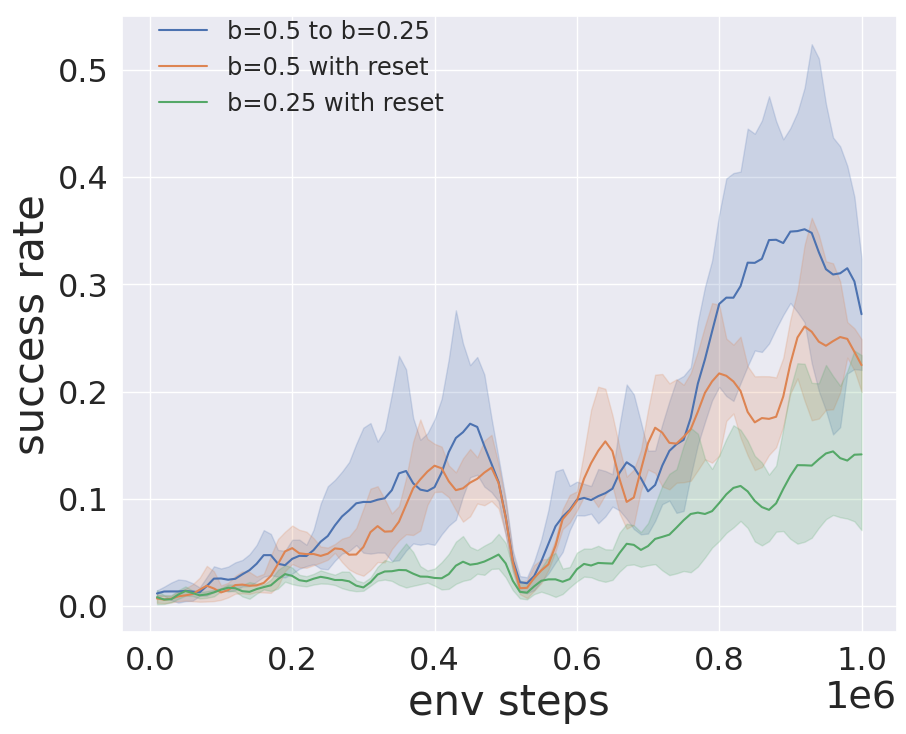

In [88]:
first_files = [
   "D2D/VVC/medium/two_stage_b_05_b_025/sac_10hz_128_128_b_05_5e5steps_seed_1_singleRL",
   "D2D/VVC/medium/two_stage_b_05_b_025/sac_10hz_128_128_b_05_5e5steps_seed_2_singleRL",
   "D2D/VVC/medium/two_stage_b_05_b_025/sac_10hz_128_128_b_05_5e5steps_seed_3_singleRL",
   "D2D/VVC/medium/two_stage_b_05_b_025/sac_10hz_128_128_b_05_5e5steps_seed_4_singleRL",
   "D2D/VVC/medium/two_stage_b_05_b_025/sac_10hz_128_128_b_05_5e5steps_seed_5_singleRL",
   


]
second_files = [
    "D2D/VVC/medium/two_stage_b_05_b_025/sac_10hz_128_128_b_05_5e5steps_b_025_5e5steps_seed_1_singleRL",
    "D2D/VVC/medium/two_stage_b_05_b_025/sac_10hz_128_128_b_05_5e5steps_b_025_5e5steps_seed_2_singleRL",
    "D2D/VVC/medium/two_stage_b_05_b_025/sac_10hz_128_128_b_05_5e5steps_b_025_5e5steps_seed_3_singleRL",
    "D2D/VVC/medium/two_stage_b_05_b_025/sac_10hz_128_128_b_05_5e5steps_b_025_5e5steps_seed_4_singleRL",
    "D2D/VVC/medium/two_stage_b_05_b_025/sac_10hz_128_128_b_05_5e5steps_b_025_5e5steps_seed_5_singleRL",  

]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_two_stage_b_05_b025 = pd.concat([load_two_stage_data("b=0.5 to b=0.25", first_filename,second_filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH,time_steps_add_to_sec_stage=500000).iloc[::] for first_filename, second_filename,seed_str in zip(first_files, second_files, seed_strs)])
print(len(df_two_stage_b_05_b025))

data_plot = pd.concat([
df_two_stage_b_05_b025,
df_b_05_with_reset,
df_b_025_with_reset,
# df_b_025_without_reset
# df_b_2_without_reset,
# df_b_05_without_reset,

    ])

data_plot["eval/success_rate"] = data_plot["eval/success_rate"]
# 取部分数据做图
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.lineplot(x="time/total_timesteps", y="eval/success_rate", hue="algo", data=data_plot, ax=ax)

ax.tick_params(axis='both',labelsize=23)

ax.set_xlabel("env steps")
ax.set_ylabel("success rate")

# sns.move_legend(ax, "lower right", bbox_to_anchor=(.5, 0.98), ncol=7, title=None, frameon=False, fontsize="x-small") # "lower center"
sns.move_legend(ax, "upper left", bbox_to_anchor=(0.02, 1.03), ncol=1, title=None, frameon=False, fontsize="xx-small") # "lower center"


## two stage b= 0.5 to b = 0.125

500


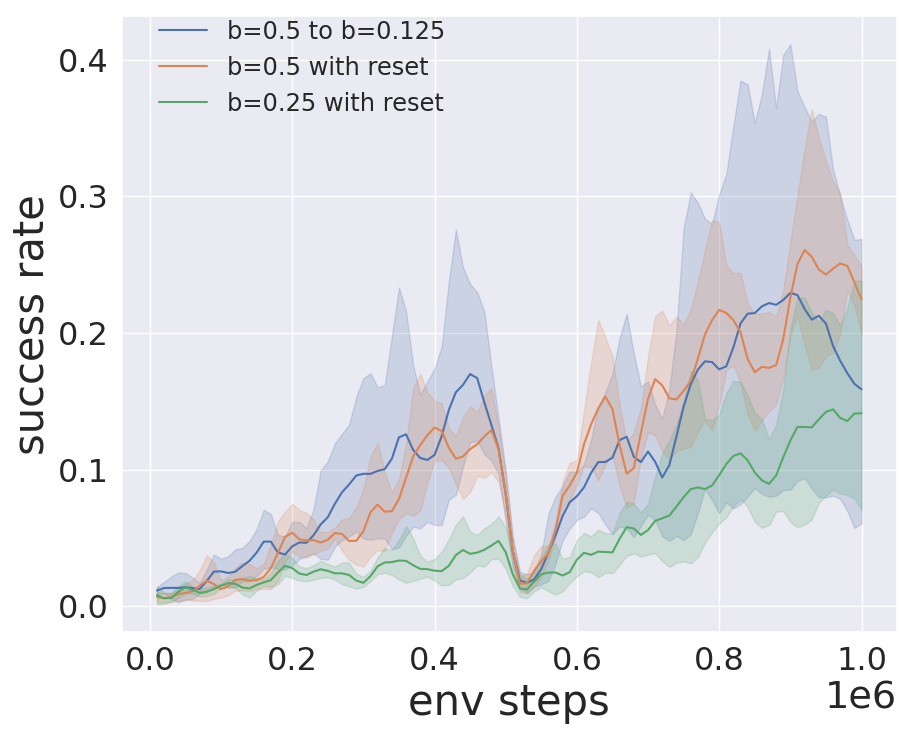

In [89]:
first_files = [
   "D2D/VVC/medium/two_stage_b_05_b_025/sac_10hz_128_128_b_05_5e5steps_seed_1_singleRL",
   "D2D/VVC/medium/two_stage_b_05_b_025/sac_10hz_128_128_b_05_5e5steps_seed_2_singleRL",
   "D2D/VVC/medium/two_stage_b_05_b_025/sac_10hz_128_128_b_05_5e5steps_seed_3_singleRL",
   "D2D/VVC/medium/two_stage_b_05_b_025/sac_10hz_128_128_b_05_5e5steps_seed_4_singleRL",
   "D2D/VVC/medium/two_stage_b_05_b_025/sac_10hz_128_128_b_05_5e5steps_seed_5_singleRL",
   


]
second_files = [
    "D2D/VVC/medium/two_stage_b_05_b_0125/sac_10hz_128_128_b_05_5e5steps_b_0125_5e5steps_seed_1_singleRL",
    "D2D/VVC/medium/two_stage_b_05_b_0125/sac_10hz_128_128_b_05_5e5steps_b_0125_5e5steps_seed_2_singleRL",
    "D2D/VVC/medium/two_stage_b_05_b_0125/sac_10hz_128_128_b_05_5e5steps_b_0125_5e5steps_seed_3_singleRL",
    "D2D/VVC/medium/two_stage_b_05_b_0125/sac_10hz_128_128_b_05_5e5steps_b_0125_5e5steps_seed_4_singleRL",
    "D2D/VVC/medium/two_stage_b_05_b_0125/sac_10hz_128_128_b_05_5e5steps_b_0125_5e5steps_seed_5_singleRL",


]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_two_stage_b_05_b0125 = pd.concat([load_two_stage_data("b=0.5 to b=0.125", first_filename,second_filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH,time_steps_add_to_sec_stage=500000).iloc[::] for first_filename, second_filename,seed_str in zip(first_files, second_files, seed_strs)])
print(len(df_two_stage_b_05_b0125))

data_plot = pd.concat([
df_two_stage_b_05_b0125,
df_b_05_with_reset,
df_b_025_with_reset,
# df_b_025_without_reset
# df_b_2_without_reset,
# df_b_05_without_reset,

    ])

data_plot["eval/success_rate"] = data_plot["eval/success_rate"]
# 取部分数据做图
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.lineplot(x="time/total_timesteps", y="eval/success_rate", hue="algo", data=data_plot, ax=ax)

ax.tick_params(axis='both',labelsize=23)

ax.set_xlabel("env steps")
ax.set_ylabel("success rate")

# sns.move_legend(ax, "lower right", bbox_to_anchor=(.5, 0.98), ncol=7, title=None, frameon=False, fontsize="x-small") # "lower center"
sns.move_legend(ax, "upper left", bbox_to_anchor=(0.02, 1.03), ncol=1, title=None, frameon=False, fontsize="xx-small") # "lower center"


## two stage b= 0.5 to b = 1

500


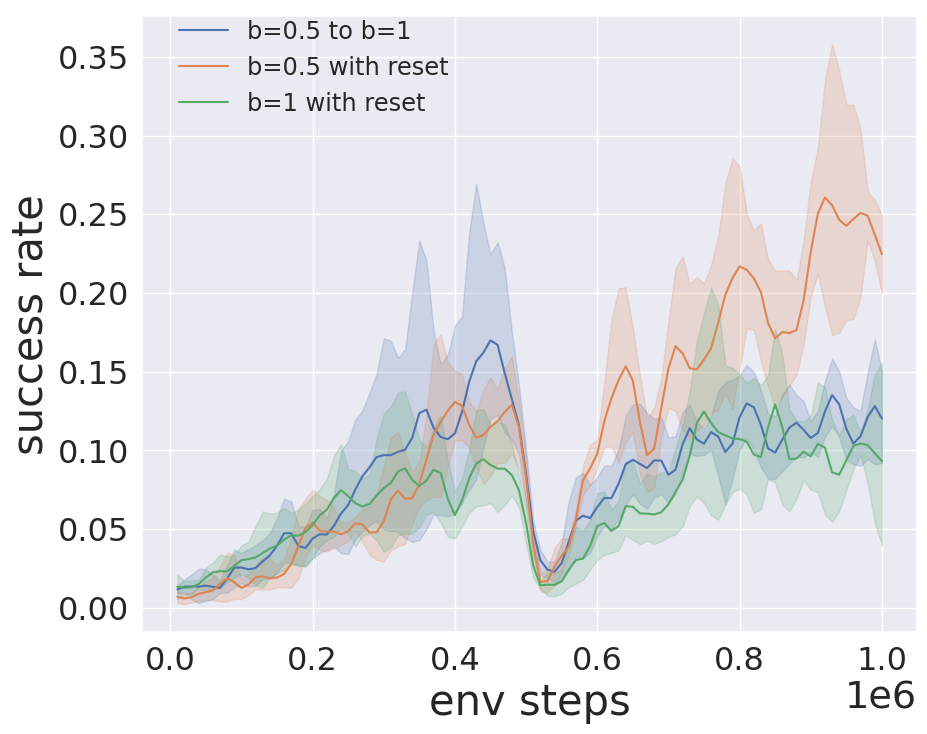

In [90]:
first_files = [
   "D2D/VVC/medium/two_stage_b_05_b_025/sac_10hz_128_128_b_05_5e5steps_seed_1_singleRL",
   "D2D/VVC/medium/two_stage_b_05_b_025/sac_10hz_128_128_b_05_5e5steps_seed_2_singleRL",
   "D2D/VVC/medium/two_stage_b_05_b_025/sac_10hz_128_128_b_05_5e5steps_seed_3_singleRL",
   "D2D/VVC/medium/two_stage_b_05_b_025/sac_10hz_128_128_b_05_5e5steps_seed_4_singleRL",
   "D2D/VVC/medium/two_stage_b_05_b_025/sac_10hz_128_128_b_05_5e5steps_seed_5_singleRL",
   


]
second_files = [
    "D2D/VVC/medium/two_stage_b_05_b_1/sac_10hz_128_128_b_05_5e5steps_b_1_5e5steps_seed_1_singleRL",
    "D2D/VVC/medium/two_stage_b_05_b_1/sac_10hz_128_128_b_05_5e5steps_b_1_5e5steps_seed_2_singleRL",
    "D2D/VVC/medium/two_stage_b_05_b_1/sac_10hz_128_128_b_05_5e5steps_b_1_5e5steps_seed_3_singleRL",
    "D2D/VVC/medium/two_stage_b_05_b_1/sac_10hz_128_128_b_05_5e5steps_b_1_5e5steps_seed_4_singleRL",
    "D2D/VVC/medium/two_stage_b_05_b_1/sac_10hz_128_128_b_05_5e5steps_b_1_5e5steps_seed_5_singleRL",


]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_two_stage_b_05_b1 = pd.concat([load_two_stage_data("b=0.5 to b=1", first_filename,second_filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH,time_steps_add_to_sec_stage=500000).iloc[::] for first_filename, second_filename,seed_str in zip(first_files, second_files, seed_strs)])
print(len(df_two_stage_b_05_b1))

data_plot = pd.concat([
df_two_stage_b_05_b1,
df_b_05_with_reset,
df_b_1_with_reset,
# df_b_025_without_reset
# df_b_2_without_reset,
# df_b_05_without_reset,

    ])

data_plot["eval/success_rate"] = data_plot["eval/success_rate"]
# 取部分数据做图
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.lineplot(x="time/total_timesteps", y="eval/success_rate", hue="algo", data=data_plot, ax=ax)

ax.tick_params(axis='both',labelsize=23)

ax.set_xlabel("env steps")
ax.set_ylabel("success rate")

# sns.move_legend(ax, "lower right", bbox_to_anchor=(.5, 0.98), ncol=7, title=None, frameon=False, fontsize="x-small") # "lower center"
sns.move_legend(ax, "upper left", bbox_to_anchor=(0.02, 1.03), ncol=1, title=None, frameon=False, fontsize="xx-small") # "lower center"


# easy 2 medium

## both evaluate on medium

500
500
500
500


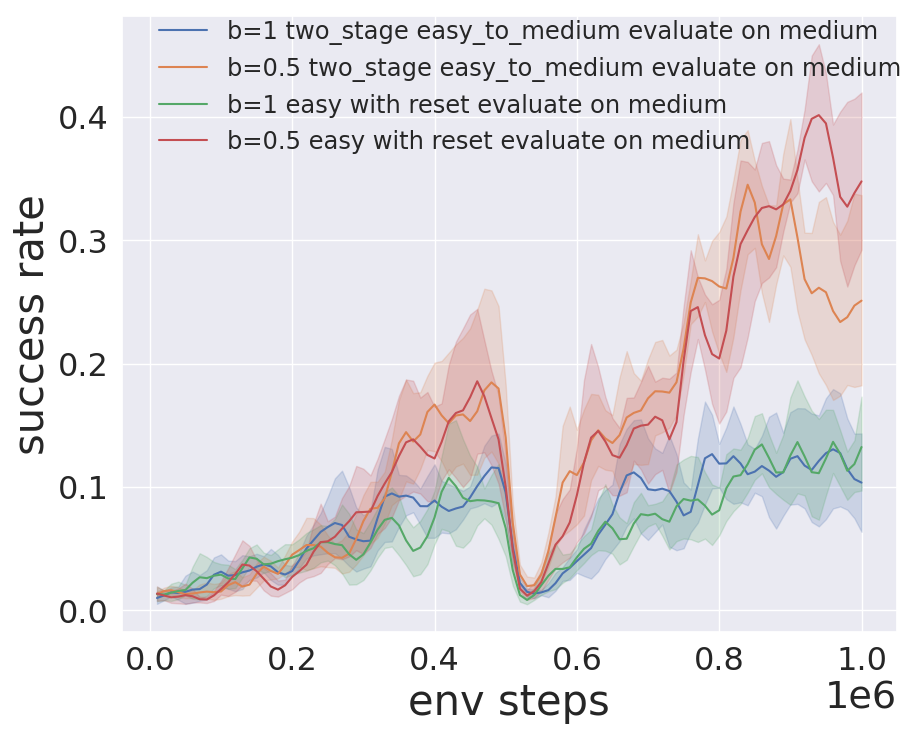

In [91]:
first_files = [
   "D2D/goal_sapce/evaluate_medium/easy_to_medium/b_1/sac_10hz_128_128_b_1_easy_5e5steps_seed_1_singleRL",
   "D2D/goal_sapce/evaluate_medium/easy_to_medium/b_1/sac_10hz_128_128_b_1_easy_5e5steps_seed_2_singleRL",
   "D2D/goal_sapce/evaluate_medium/easy_to_medium/b_1/sac_10hz_128_128_b_1_easy_5e5steps_seed_3_singleRL",
   "D2D/goal_sapce/evaluate_medium/easy_to_medium/b_1/sac_10hz_128_128_b_1_easy_5e5steps_seed_4_singleRL",
   "D2D/goal_sapce/evaluate_medium/easy_to_medium/b_1/sac_10hz_128_128_b_1_easy_5e5steps_seed_5_singleRL",

]
second_files = [
    "D2D/goal_sapce/evaluate_medium/easy_to_medium/b_1/sac_10hz_128_128_b_1_easy_to_medium_5e5steps_seed_1_singleRL", 
    "D2D/goal_sapce/evaluate_medium/easy_to_medium/b_1/sac_10hz_128_128_b_1_easy_to_medium_5e5steps_seed_2_singleRL", 
    "D2D/goal_sapce/evaluate_medium/easy_to_medium/b_1/sac_10hz_128_128_b_1_easy_to_medium_5e5steps_seed_3_singleRL", 
    "D2D/goal_sapce/evaluate_medium/easy_to_medium/b_1/sac_10hz_128_128_b_1_easy_to_medium_5e5steps_seed_4_singleRL", 
    "D2D/goal_sapce/evaluate_medium/easy_to_medium/b_1/sac_10hz_128_128_b_1_easy_to_medium_5e5steps_seed_5_singleRL", 
 
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b_1_two_stage_easy_to_medium_evaluate_on_medium = pd.concat([load_two_stage_data("b=1 two_stage easy_to_medium evaluate on medium", first_filename,second_filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH,time_steps_add_to_sec_stage=500000).iloc[::] for first_filename, second_filename,seed_str in zip(first_files, second_files, seed_strs)])
print(len(df_b_1_two_stage_easy_to_medium_evaluate_on_medium))



first_files = [
   "D2D/goal_sapce/evaluate_medium/easy_to_medium/b_05/sac_10hz_128_128_b_05_easy_5e5steps_seed_1_singleRL",
   "D2D/goal_sapce/evaluate_medium/easy_to_medium/b_05/sac_10hz_128_128_b_05_easy_5e5steps_seed_2_singleRL",
   "D2D/goal_sapce/evaluate_medium/easy_to_medium/b_05/sac_10hz_128_128_b_05_easy_5e5steps_seed_3_singleRL",
   "D2D/goal_sapce/evaluate_medium/easy_to_medium/b_05/sac_10hz_128_128_b_05_easy_5e5steps_seed_4_singleRL",
   "D2D/goal_sapce/evaluate_medium/easy_to_medium/b_05/sac_10hz_128_128_b_05_easy_5e5steps_seed_5_singleRL",


]
second_files = [
    "D2D/goal_sapce/evaluate_medium/easy_to_medium/b_05/sac_10hz_128_128_b_05_easy_to_medium_5e5steps_seed_1_singleRL",
    "D2D/goal_sapce/evaluate_medium/easy_to_medium/b_05/sac_10hz_128_128_b_05_easy_to_medium_5e5steps_seed_2_singleRL", 
    "D2D/goal_sapce/evaluate_medium/easy_to_medium/b_05/sac_10hz_128_128_b_05_easy_to_medium_5e5steps_seed_3_singleRL", 
    "D2D/goal_sapce/evaluate_medium/easy_to_medium/b_05/sac_10hz_128_128_b_05_easy_to_medium_5e5steps_seed_4_singleRL", 
    "D2D/goal_sapce/evaluate_medium/easy_to_medium/b_05/sac_10hz_128_128_b_05_easy_to_medium_5e5steps_seed_5_singleRL",  

 
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b_05_two_stage_easy_to_medium_evaluate_on_medium = pd.concat([load_two_stage_data("b=0.5 two_stage easy_to_medium evaluate on medium", first_filename,second_filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH,time_steps_add_to_sec_stage=500000).iloc[::] for first_filename, second_filename,seed_str in zip(first_files, second_files, seed_strs)])
print(len(df_b_05_two_stage_easy_to_medium_evaluate_on_medium))


first_files = [
   "D2D/VVC/easy_sac/baseline/evaluate_medium/b_1/sac_10hz_128_128_b_1_5e5steps_seed_1_singleRL",
   "D2D/VVC/easy_sac/baseline/evaluate_medium/b_1/sac_10hz_128_128_b_1_5e5steps_seed_2_singleRL",
   "D2D/VVC/easy_sac/baseline/evaluate_medium/b_1/sac_10hz_128_128_b_1_5e5steps_seed_3_singleRL",
   "D2D/VVC/easy_sac/baseline/evaluate_medium/b_1/sac_10hz_128_128_b_1_5e5steps_seed_4_singleRL",
   "D2D/VVC/easy_sac/baseline/evaluate_medium/b_1/sac_10hz_128_128_b_1_5e5steps_seed_5_singleRL",


]
second_files = [
    "D2D/VVC/easy_sac/baseline/evaluate_medium/b_1/sac_10hz_128_128_b_1_5e5steps_b_1_5e5steps_seed_1_singleRL",
    "D2D/VVC/easy_sac/baseline/evaluate_medium/b_1/sac_10hz_128_128_b_1_5e5steps_b_1_5e5steps_seed_2_singleRL",
    "D2D/VVC/easy_sac/baseline/evaluate_medium/b_1/sac_10hz_128_128_b_1_5e5steps_b_1_5e5steps_seed_3_singleRL",
    "D2D/VVC/easy_sac/baseline/evaluate_medium/b_1/sac_10hz_128_128_b_1_5e5steps_b_1_5e5steps_seed_4_singleRL",
    "D2D/VVC/easy_sac/baseline/evaluate_medium/b_1/sac_10hz_128_128_b_1_5e5steps_b_1_5e5steps_seed_5_singleRL",
 
]

seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b_1_easy_with_reset_evaluate_on_medium = pd.concat([load_two_stage_data("b=1 easy with reset evaluate on medium", first_filename,second_filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH,time_steps_add_to_sec_stage=500000).iloc[::] for first_filename, second_filename,seed_str in zip(first_files, second_files, seed_strs)])
print(len(df_b_1_easy_with_reset_evaluate_on_medium))




first_files = [
   "D2D/VVC/easy_sac/baseline/evaluate_medium/b_05/sac_10hz_128_128_b_05_5e5steps_seed_1_singleRL",
   "D2D/VVC/easy_sac/baseline/evaluate_medium/b_05/sac_10hz_128_128_b_05_5e5steps_seed_2_singleRL",
   "D2D/VVC/easy_sac/baseline/evaluate_medium/b_05/sac_10hz_128_128_b_05_5e5steps_seed_3_singleRL",
   "D2D/VVC/easy_sac/baseline/evaluate_medium/b_05/sac_10hz_128_128_b_05_5e5steps_seed_4_singleRL",
   "D2D/VVC/easy_sac/baseline/evaluate_medium/b_05/sac_10hz_128_128_b_05_5e5steps_seed_5_singleRL",

]
second_files = [
    "D2D/VVC/easy_sac/baseline/evaluate_medium/b_05/sac_10hz_128_128_b_05_5e5steps_b_05_5e5steps_seed_1_singleRL",
    "D2D/VVC/easy_sac/baseline/evaluate_medium/b_05/sac_10hz_128_128_b_05_5e5steps_b_05_5e5steps_seed_2_singleRL",
    "D2D/VVC/easy_sac/baseline/evaluate_medium/b_05/sac_10hz_128_128_b_05_5e5steps_b_05_5e5steps_seed_3_singleRL",
    "D2D/VVC/easy_sac/baseline/evaluate_medium/b_05/sac_10hz_128_128_b_05_5e5steps_b_05_5e5steps_seed_4_singleRL",
    "D2D/VVC/easy_sac/baseline/evaluate_medium/b_05/sac_10hz_128_128_b_05_5e5steps_b_05_5e5steps_seed_5_singleRL",


 
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b_05_easy_with_reset_evaluate_on_medium = pd.concat([load_two_stage_data("b=0.5 easy with reset evaluate on medium", first_filename,second_filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH,time_steps_add_to_sec_stage=500000).iloc[::] for first_filename, second_filename,seed_str in zip(first_files, second_files, seed_strs)])
print(len(df_b_05_easy_with_reset_evaluate_on_medium))



data_plot = pd.concat([
df_b_1_two_stage_easy_to_medium_evaluate_on_medium,
df_b_05_two_stage_easy_to_medium_evaluate_on_medium,
df_b_1_easy_with_reset_evaluate_on_medium,
df_b_05_easy_with_reset_evaluate_on_medium,

    ])

data_plot["eval/success_rate"] = data_plot["eval/success_rate"]
# 取部分数据做图
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.lineplot(x="time/total_timesteps", y="eval/success_rate", hue="algo", data=data_plot, ax=ax)

ax.tick_params(axis='both',labelsize=23)

ax.set_xlabel("env steps")
ax.set_ylabel("success rate")

# sns.move_legend(ax, "lower right", bbox_to_anchor=(.5, 0.98), ncol=7, title=None, frameon=False, fontsize="x-small") # "lower center"
sns.move_legend(ax, "upper left", bbox_to_anchor=(0.02, 1.03), ncol=1, title=None, frameon=False, fontsize="xx-small") # "lower center"


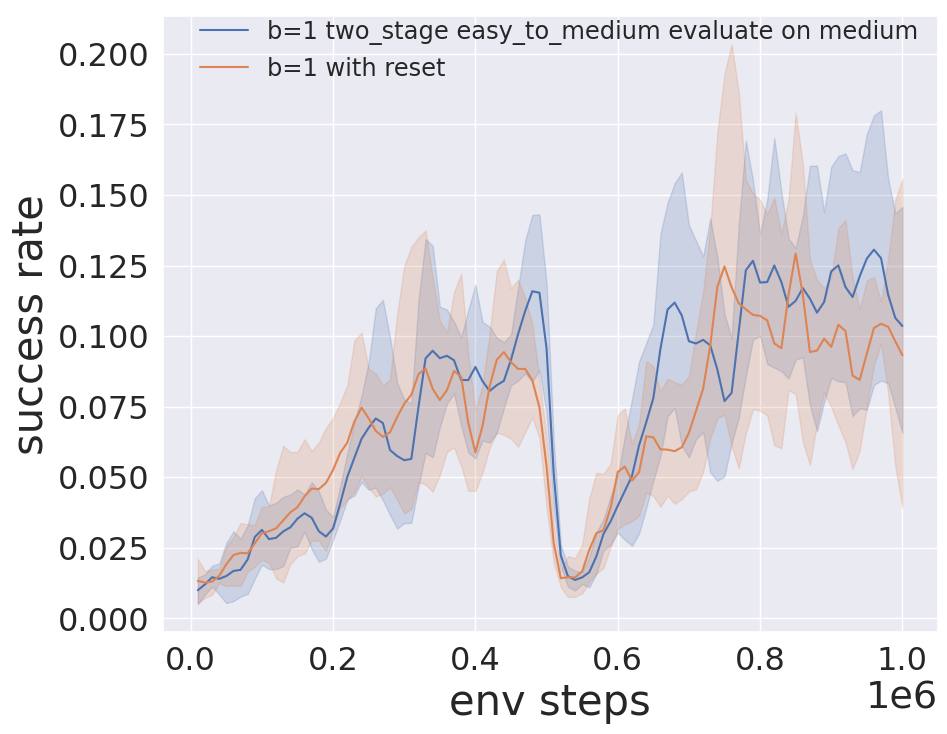

In [103]:
data_plot = pd.concat([
df_b_1_two_stage_easy_to_medium_evaluate_on_medium,
#df_b_1_easy_with_reset_evaluate_on_medium,
df_b_1_with_reset
    ])

data_plot["eval/success_rate"] = data_plot["eval/success_rate"]
# 取部分数据做图
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.lineplot(x="time/total_timesteps", y="eval/success_rate", hue="algo", data=data_plot, ax=ax)

ax.tick_params(axis='both',labelsize=23)

ax.set_xlabel("env steps")
ax.set_ylabel("success rate")

# sns.move_legend(ax, "lower right", bbox_to_anchor=(.5, 0.98), ncol=7, title=None, frameon=False, fontsize="x-small") # "lower center"
sns.move_legend(ax, "upper left", bbox_to_anchor=(0.02, 1.03), ncol=1, title=None, frameon=False, fontsize="xx-small") # "lower center"

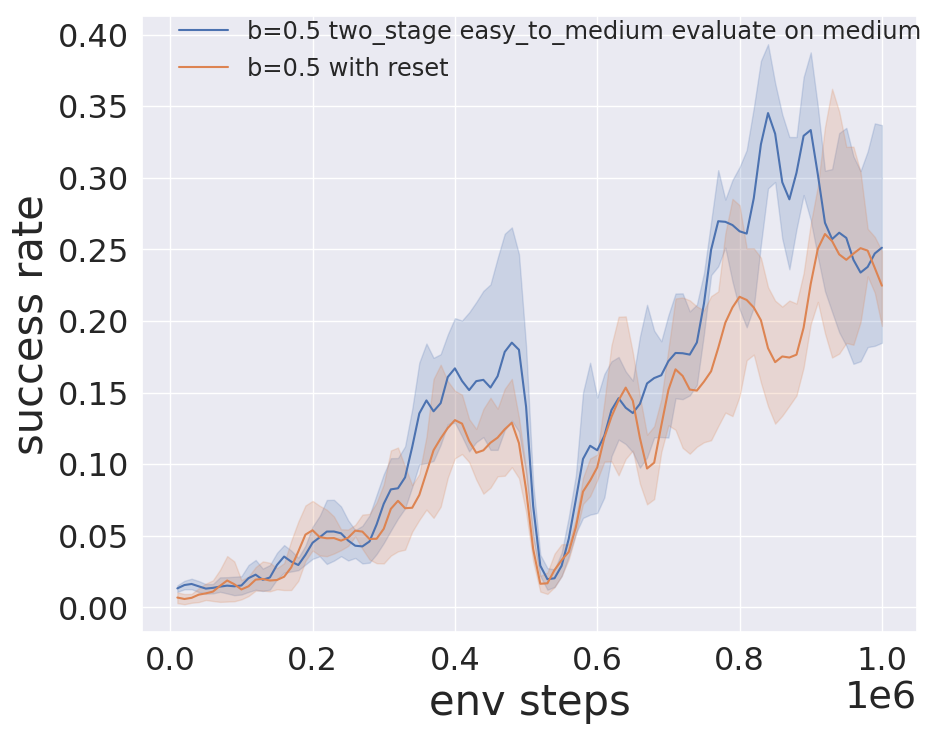

In [93]:
data_plot = pd.concat([

df_b_05_two_stage_easy_to_medium_evaluate_on_medium,
#df_b_05_easy_with_reset_evaluate_on_medium,
df_b_05_with_reset
    ])

data_plot["eval/success_rate"] = data_plot["eval/success_rate"]
# 取部分数据做图
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.lineplot(x="time/total_timesteps", y="eval/success_rate", hue="algo", data=data_plot, ax=ax)

ax.tick_params(axis='both',labelsize=23)

ax.set_xlabel("env steps")
ax.set_ylabel("success rate")

# sns.move_legend(ax, "lower right", bbox_to_anchor=(.5, 0.98), ncol=7, title=None, frameon=False, fontsize="x-small") # "lower center"
sns.move_legend(ax, "upper left", bbox_to_anchor=(0.02, 1.03), ncol=1, title=None, frameon=False, fontsize="xx-small") # "lower center"

## easy 2 mdeium  easy eval  on easy , medium eval on medium

## b = 1

500
500
500
500
500


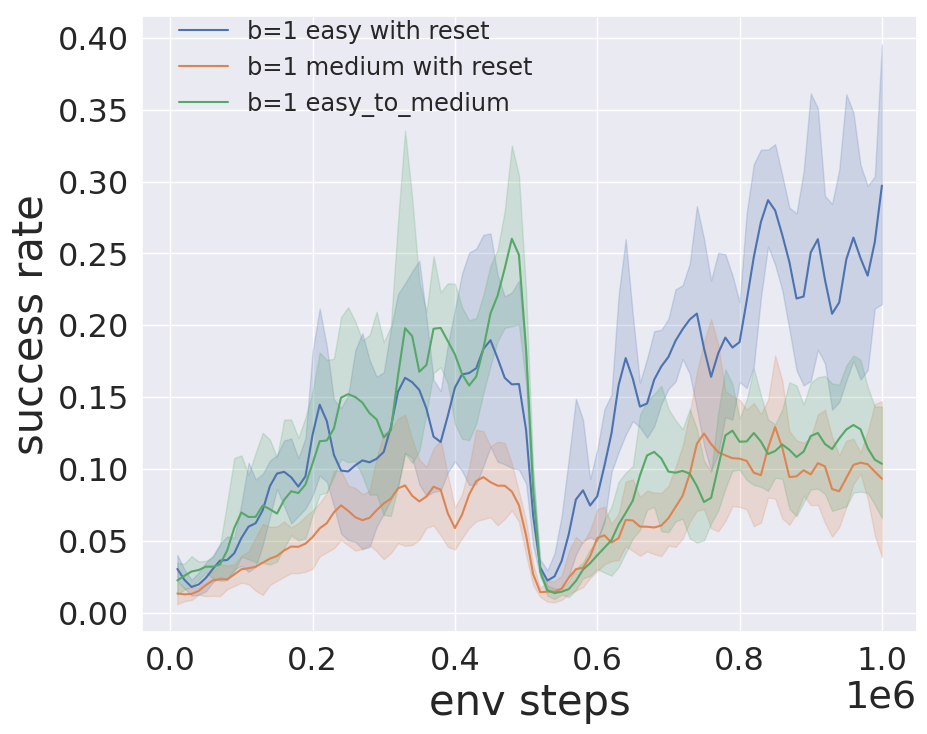

In [94]:
files = [
    "D2D/VVC/easy_sac/b_1/sac_10hz_128_128_b_1_1e6steps_seed_1_singleRL",
    "D2D/VVC/easy_sac/b_1/sac_10hz_128_128_b_1_1e6steps_seed_2_singleRL", 
    "D2D/VVC/easy_sac/b_1/sac_10hz_128_128_b_1_1e6steps_seed_3_singleRL", 
    "D2D/VVC/easy_sac/b_1/sac_10hz_128_128_b_1_1e6steps_seed_4_singleRL", 
    "D2D/VVC/easy_sac/b_1/sac_10hz_128_128_b_1_1e6steps_seed_5_singleRL",  

]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b_1_esay_without_reset = pd.concat([load_data("b=1 easy without reset", filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_b_1_esay_without_reset))


first_files = [
   "D2D/goal_sapce/easy_to_medium/sac_10hz_128_128_b_1_easy_5e5steps_seed_1_singleRL",
   "D2D/goal_sapce/easy_to_medium/sac_10hz_128_128_b_1_easy_5e5steps_seed_2_singleRL",
   "D2D/goal_sapce/easy_to_medium/sac_10hz_128_128_b_1_easy_5e5steps_seed_3_singleRL",
   "D2D/goal_sapce/easy_to_medium/sac_10hz_128_128_b_1_easy_5e5steps_seed_4_singleRL",
   "D2D/goal_sapce/easy_to_medium/sac_10hz_128_128_b_1_easy_5e5steps_seed_5_singleRL",
]
second_files = [
    "D2D/goal_sapce/easy_to_medium/sac_10hz_128_128_b_1_easy_to_medium_5e5steps_seed_1_singleRL", 
    "D2D/goal_sapce/easy_to_medium/sac_10hz_128_128_b_1_easy_to_medium_5e5steps_seed_2_singleRL", 
    "D2D/goal_sapce/easy_to_medium/sac_10hz_128_128_b_1_easy_to_medium_5e5steps_seed_3_singleRL",
    "D2D/goal_sapce/easy_to_medium/sac_10hz_128_128_b_1_easy_to_medium_5e5steps_seed_4_singleRL", 
    "D2D/goal_sapce/easy_to_medium/sac_10hz_128_128_b_1_easy_to_medium_5e5steps_seed_5_singleRL",   
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b_1_two_stage_easy_to_medium = pd.concat([load_two_stage_data("b=1 easy_to_medium", first_filename,second_filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH,time_steps_add_to_sec_stage=500000).iloc[::] for first_filename, second_filename,seed_str in zip(first_files, second_files, seed_strs)])
print(len(df_b_1_two_stage_easy_to_medium))

files = [
    "D2D/VVC/medium/b_1/sac_10hz_128_128_b_1_1e6steps_seed_1_singleRL", 
    "D2D/VVC/medium/b_1/sac_10hz_128_128_b_1_1e6steps_seed_2_singleRL", 
    "D2D/VVC/medium/b_1/sac_10hz_128_128_b_1_1e6steps_seed_3_singleRL", 
    "D2D/VVC/medium/b_1/sac_10hz_128_128_b_1_1e6steps_seed_4_singleRL", 
    "D2D/VVC/medium/b_1/sac_10hz_128_128_b_1_1e6steps_seed_5_singleRL", 
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b_1_medium_without_reset = pd.concat([load_data("b=1 medium without reset", filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_b_1_medium_without_reset))


first_files = [
   "D2D/VVC/easy_sac/baseline/b_1/sac_10hz_128_128_b_1_5e5steps_seed_1_singleRL",
   "D2D/VVC/easy_sac/baseline/b_1/sac_10hz_128_128_b_1_5e5steps_seed_2_singleRL",
   "D2D/VVC/easy_sac/baseline/b_1/sac_10hz_128_128_b_1_5e5steps_seed_3_singleRL",
   "D2D/VVC/easy_sac/baseline/b_1/sac_10hz_128_128_b_1_5e5steps_seed_4_singleRL",
   "D2D/VVC/easy_sac/baseline/b_1/sac_10hz_128_128_b_1_5e5steps_seed_5_singleRL",


]
second_files = [
    "D2D/VVC/easy_sac/baseline/b_1/sac_10hz_128_128_b_1_5e5steps_b_1_5e5steps_seed_1_singleRL",
    "D2D/VVC/easy_sac/baseline/b_1/sac_10hz_128_128_b_1_5e5steps_b_1_5e5steps_seed_2_singleRL",
    "D2D/VVC/easy_sac/baseline/b_1/sac_10hz_128_128_b_1_5e5steps_b_1_5e5steps_seed_3_singleRL",
    "D2D/VVC/easy_sac/baseline/b_1/sac_10hz_128_128_b_1_5e5steps_b_1_5e5steps_seed_4_singleRL",
    "D2D/VVC/easy_sac/baseline/b_1/sac_10hz_128_128_b_1_5e5steps_b_1_5e5steps_seed_5_singleRL",


 
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b_1_esay_with_reset = pd.concat([load_two_stage_data("b=1 easy with reset", first_filename,second_filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH,time_steps_add_to_sec_stage=500000).iloc[::] for first_filename, second_filename,seed_str in zip(first_files, second_files, seed_strs)])
print(len(df_b_1_esay_with_reset))


first_files = [
   "D2D/VVC/medium/baseline/two_stage_b_1_b_1/sac_10hz_128_128_b_1_5e5steps_seed_1_singleRL",
   "D2D/VVC/medium/baseline/two_stage_b_1_b_1/sac_10hz_128_128_b_1_5e5steps_seed_2_singleRL",
   "D2D/VVC/medium/baseline/two_stage_b_1_b_1/sac_10hz_128_128_b_1_5e5steps_seed_3_singleRL",
   "D2D/VVC/medium/baseline/two_stage_b_1_b_1/sac_10hz_128_128_b_1_5e5steps_seed_4_singleRL",
   "D2D/VVC/medium/baseline/two_stage_b_1_b_1/sac_10hz_128_128_b_1_5e5steps_seed_5_singleRL",
]
second_files = [
     "D2D/VVC/medium/baseline/two_stage_b_1_b_1/sac_10hz_128_128_b_1_5e5steps_b_1_5e5steps_seed_1_singleRL",
     "D2D/VVC/medium/baseline/two_stage_b_1_b_1/sac_10hz_128_128_b_1_5e5steps_b_1_5e5steps_seed_2_singleRL",
     "D2D/VVC/medium/baseline/two_stage_b_1_b_1/sac_10hz_128_128_b_1_5e5steps_b_1_5e5steps_seed_3_singleRL",
     "D2D/VVC/medium/baseline/two_stage_b_1_b_1/sac_10hz_128_128_b_1_5e5steps_b_1_5e5steps_seed_4_singleRL",
     "D2D/VVC/medium/baseline/two_stage_b_1_b_1/sac_10hz_128_128_b_1_5e5steps_b_1_5e5steps_seed_5_singleRL",
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b_1_medium_with_reset = pd.concat([load_two_stage_data("b=1 medium with reset", first_filename,second_filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH,time_steps_add_to_sec_stage=500000).iloc[::] for first_filename, second_filename,seed_str in zip(first_files, second_files, seed_strs)])
print(len(df_b_1_medium_with_reset))


data_plot = pd.concat([
# df_b_1_esay_without_reset,
df_b_1_esay_with_reset,
# df_b_1_medium_without_reset,
df_b_1_medium_with_reset,
df_b_1_two_stage_easy_to_medium,
    ])

data_plot["eval/success_rate"] = data_plot["eval/success_rate"]
# 取部分数据做图
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.lineplot(x="time/total_timesteps", y="eval/success_rate", hue="algo", data=data_plot, ax=ax)

ax.tick_params(axis='both',labelsize=23)

ax.set_xlabel("env steps")
ax.set_ylabel("success rate")

# sns.move_legend(ax, "lower right", bbox_to_anchor=(.5, 0.98), ncol=7, title=None, frameon=False, fontsize="x-small") # "lower center"
sns.move_legend(ax, "upper left", bbox_to_anchor=(0.02, 1.03), ncol=1, title=None, frameon=False, fontsize="xx-small") # "lower center"


## easy 2 mdeium  easy eval  on easy , medium eval on medium

## b = 0.5

500
500
500
500
500


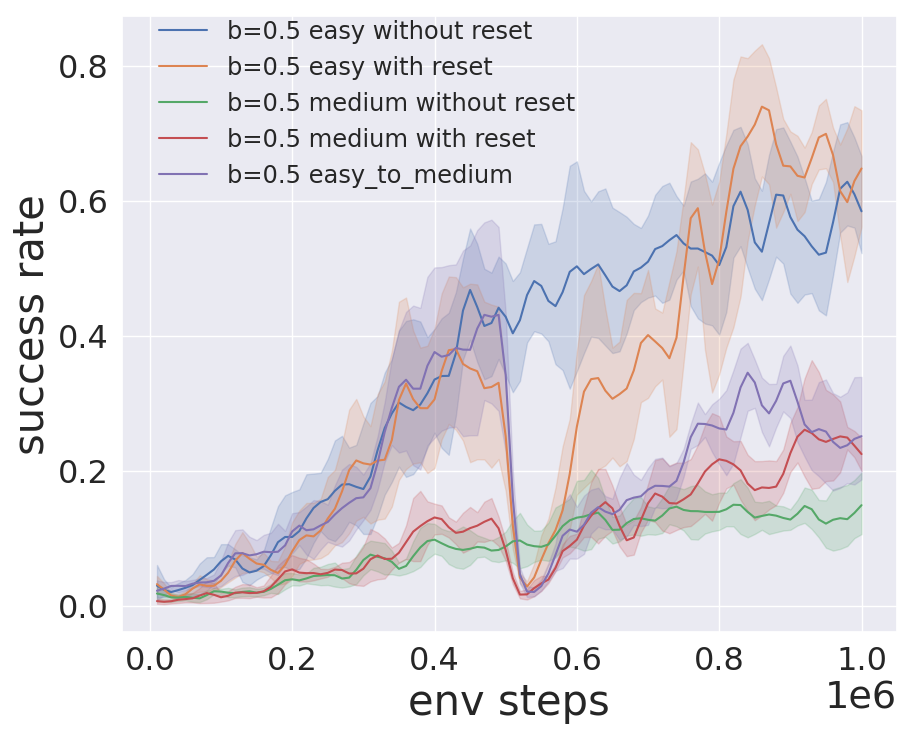

In [95]:
files = [
    "D2D/VVC/easy_sac/b_05/sac_10hz_128_128_b_05_1e6steps_seed_1_singleRL", 
    "D2D/VVC/easy_sac/b_05/sac_10hz_128_128_b_05_1e6steps_seed_2_singleRL", 
    "D2D/VVC/easy_sac/b_05/sac_10hz_128_128_b_05_1e6steps_seed_3_singleRL", 
    "D2D/VVC/easy_sac/b_05/sac_10hz_128_128_b_05_1e6steps_seed_4_singleRL", 
    "D2D/VVC/easy_sac/b_05/sac_10hz_128_128_b_05_1e6steps_seed_5_singleRL", 
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b_05esay_without_reset = pd.concat([load_data("b=0.5 easy without reset", filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_b_05esay_without_reset))


files = [
    "D2D/VVC/medium/b_05/sac_10hz_128_128_b_05_1e6steps_seed_1_singleRL", 
    "D2D/VVC/medium/b_05/sac_10hz_128_128_b_05_1e6steps_seed_2_singleRL",
    "D2D/VVC/medium/b_05/sac_10hz_128_128_b_05_1e6steps_seed_3_singleRL", 
    "D2D/VVC/medium/b_05/sac_10hz_128_128_b_05_1e6steps_seed_4_singleRL", 
    "D2D/VVC/medium/b_05/sac_10hz_128_128_b_05_1e6steps_seed_5_singleRL",  
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b_05_medium_without_reset = pd.concat([load_data("b=0.5 medium without reset", filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_b_05_medium_without_reset))


first_files = [
   "D2D/goal_sapce/easy_to_medium/b_05/sac_10hz_128_128_b_05_easy_5e5steps_seed_1_singleRL",
   "D2D/goal_sapce/easy_to_medium/b_05/sac_10hz_128_128_b_05_easy_5e5steps_seed_2_singleRL",
   "D2D/goal_sapce/easy_to_medium/b_05/sac_10hz_128_128_b_05_easy_5e5steps_seed_3_singleRL",
   "D2D/goal_sapce/easy_to_medium/b_05/sac_10hz_128_128_b_05_easy_5e5steps_seed_4_singleRL",
   "D2D/goal_sapce/easy_to_medium/b_05/sac_10hz_128_128_b_05_easy_5e5steps_seed_5_singleRL",
]
second_files = [
    "D2D/goal_sapce/easy_to_medium/b_05/sac_10hz_128_128_b_05_easy_to_medium_5e5steps_seed_1_singleRL", 
    "D2D/goal_sapce/easy_to_medium/b_05/sac_10hz_128_128_b_05_easy_to_medium_5e5steps_seed_2_singleRL",
    "D2D/goal_sapce/easy_to_medium/b_05/sac_10hz_128_128_b_05_easy_to_medium_5e5steps_seed_3_singleRL", 
    "D2D/goal_sapce/easy_to_medium/b_05/sac_10hz_128_128_b_05_easy_to_medium_5e5steps_seed_4_singleRL", 
    "D2D/goal_sapce/easy_to_medium/b_05/sac_10hz_128_128_b_05_easy_to_medium_5e5steps_seed_5_singleRL",    
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b_05_two_stage_easy_to_medium = pd.concat([load_two_stage_data("b=0.5 easy_to_medium", first_filename,second_filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH,time_steps_add_to_sec_stage=500000).iloc[::] for first_filename, second_filename,seed_str in zip(first_files, second_files, seed_strs)])
print(len(df_b_05_two_stage_easy_to_medium))


first_files = [
   "D2D/VVC/easy_sac/baseline/b_05/sac_10hz_128_128_b_05_5e5steps_seed_1_singleRL",
   "D2D/VVC/easy_sac/baseline/b_05/sac_10hz_128_128_b_05_5e5steps_seed_2_singleRL",
   "D2D/VVC/easy_sac/baseline/b_05/sac_10hz_128_128_b_05_5e5steps_seed_3_singleRL",
   "D2D/VVC/easy_sac/baseline/b_05/sac_10hz_128_128_b_05_5e5steps_seed_4_singleRL",
   "D2D/VVC/easy_sac/baseline/b_05/sac_10hz_128_128_b_05_5e5steps_seed_5_singleRL",   


]
second_files = [
    "D2D/VVC/easy_sac/baseline/b_05/sac_10hz_128_128_b_05_5e5steps_b_05_5e5steps_seed_1_singleRL",
    "D2D/VVC/easy_sac/baseline/b_05/sac_10hz_128_128_b_05_5e5steps_b_05_5e5steps_seed_2_singleRL",
    "D2D/VVC/easy_sac/baseline/b_05/sac_10hz_128_128_b_05_5e5steps_b_05_5e5steps_seed_3_singleRL",
    "D2D/VVC/easy_sac/baseline/b_05/sac_10hz_128_128_b_05_5e5steps_b_05_5e5steps_seed_4_singleRL",
    "D2D/VVC/easy_sac/baseline/b_05/sac_10hz_128_128_b_05_5e5steps_b_05_5e5steps_seed_5_singleRL",
 
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b_05_esay_with_reset = pd.concat([load_two_stage_data("b=0.5 easy with reset", first_filename,second_filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH,time_steps_add_to_sec_stage=500000).iloc[::] for first_filename, second_filename,seed_str in zip(first_files, second_files, seed_strs)])
print(len(df_b_05_esay_with_reset))


first_files = [
   "D2D/VVC/medium/baseline/two_stage_b_05_b_05/sac_10hz_128_128_b_05_5e5steps_seed_1_singleRL",
   "D2D/VVC/medium/baseline/two_stage_b_05_b_05/sac_10hz_128_128_b_05_5e5steps_seed_2_singleRL",
   "D2D/VVC/medium/baseline/two_stage_b_05_b_05/sac_10hz_128_128_b_05_5e5steps_seed_3_singleRL",
   "D2D/VVC/medium/baseline/two_stage_b_05_b_05/sac_10hz_128_128_b_05_5e5steps_seed_4_singleRL",
   "D2D/VVC/medium/baseline/two_stage_b_05_b_05/sac_10hz_128_128_b_05_5e5steps_seed_5_singleRL",

]
second_files = [
     "D2D/VVC/medium/baseline/two_stage_b_05_b_05/sac_10hz_128_128_b_05_5e5steps_b_05_5e5steps_seed_1_singleRL",
     "D2D/VVC/medium/baseline/two_stage_b_05_b_05/sac_10hz_128_128_b_05_5e5steps_b_05_5e5steps_seed_2_singleRL",
     "D2D/VVC/medium/baseline/two_stage_b_05_b_05/sac_10hz_128_128_b_05_5e5steps_b_05_5e5steps_seed_3_singleRL",
     "D2D/VVC/medium/baseline/two_stage_b_05_b_05/sac_10hz_128_128_b_05_5e5steps_b_05_5e5steps_seed_4_singleRL",
     "D2D/VVC/medium/baseline/two_stage_b_05_b_05/sac_10hz_128_128_b_05_5e5steps_b_05_5e5steps_seed_5_singleRL",

]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b_05_medium_with_reset = pd.concat([load_two_stage_data("b=0.5 medium with reset", first_filename,second_filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH,time_steps_add_to_sec_stage=500000).iloc[::] for first_filename, second_filename,seed_str in zip(first_files, second_files, seed_strs)])
print(len(df_b_05_medium_with_reset))

data_plot = pd.concat([
    df_b_05esay_without_reset,
    df_b_05_esay_with_reset,
    df_b_05_medium_without_reset,
    df_b_05_medium_with_reset,
    df_b_05_two_stage_easy_to_medium,
    ])

data_plot["eval/success_rate"] = data_plot["eval/success_rate"]
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.lineplot(x="time/total_timesteps", y="eval/success_rate", hue="algo", data=data_plot, ax=ax)

ax.tick_params(axis='both',labelsize=23)

ax.set_xlabel("env steps")
ax.set_ylabel("success rate")

# sns.move_legend(ax, "lower right", bbox_to_anchor=(.5, 0.98), ncol=7, title=None, frameon=False, fontsize="x-small") # "lower center"
sns.move_legend(ax, "upper left", bbox_to_anchor=(0.02, 1.03), ncol=1, title=None, frameon=False, fontsize="xx-small") # "lower center"


# reward devide 

## b = 1 

500
500
500
500


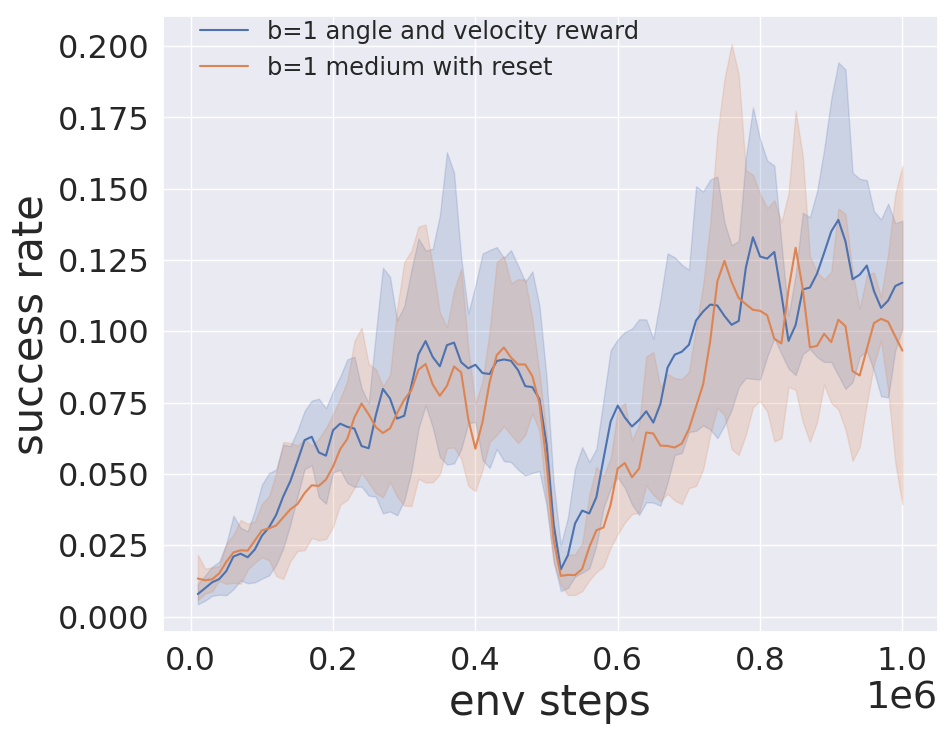

In [96]:
first_files = [
   "D2D/reward_devide/medium/b_1/sac_10hz_128_128_b_1_angle_only_medium_5e5steps_seed_1_singleRL",
   "D2D/reward_devide/medium/b_1/sac_10hz_128_128_b_1_angle_only_medium_5e5steps_seed_2_singleRL",
   "D2D/reward_devide/medium/b_1/sac_10hz_128_128_b_1_angle_only_medium_5e5steps_seed_3_singleRL",
   "D2D/reward_devide/medium/b_1/sac_10hz_128_128_b_1_angle_only_medium_5e5steps_seed_4_singleRL",
   "D2D/reward_devide/medium/b_1/sac_10hz_128_128_b_1_angle_only_medium_5e5steps_seed_5_singleRL",

]
second_files = [
    "D2D/reward_devide/medium/b_1/sac_10hz_128_128_b_1_angle_only_to_both_reward_medium_5e5steps_seed_1_singleRL", 
    "D2D/reward_devide/medium/b_1/sac_10hz_128_128_b_1_angle_only_to_both_reward_medium_5e5steps_seed_2_singleRL", 
    "D2D/reward_devide/medium/b_1/sac_10hz_128_128_b_1_angle_only_to_both_reward_medium_5e5steps_seed_3_singleRL", 
    "D2D/reward_devide/medium/b_1/sac_10hz_128_128_b_1_angle_only_to_both_reward_medium_5e5steps_seed_4_singleRL", 
    "D2D/reward_devide/medium/b_1/sac_10hz_128_128_b_1_angle_only_to_both_reward_medium_5e5steps_seed_5_singleRL", 
  
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b_1_angle_and_velocity_reward = pd.concat([load_two_stage_data("b=1 angle and velocity reward", first_filename,second_filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH,time_steps_add_to_sec_stage=500000).iloc[::] for first_filename, second_filename,seed_str in zip(first_files, second_files, seed_strs)])
print(len(df_b_1_angle_and_velocity_reward))

files = [
    "D2D/reward_devide/medium/b_1_only/sac_10hz_128_128_b_1_angle_only_medium_1e6steps_seed_1_singleRL", 
    "D2D/reward_devide/medium/b_1_only/sac_10hz_128_128_b_1_angle_only_medium_1e6steps_seed_2_singleRL", 
    "D2D/reward_devide/medium/b_1_only/sac_10hz_128_128_b_1_angle_only_medium_1e6steps_seed_3_singleRL", 
    "D2D/reward_devide/medium/b_1_only/sac_10hz_128_128_b_1_angle_only_medium_1e6steps_seed_4_singleRL", 
    "D2D/reward_devide/medium/b_1_only/sac_10hz_128_128_b_1_angle_only_medium_1e6steps_seed_5_singleRL", 
]

seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b_1_angle_without_reset_reward  = pd.concat([load_data("b = 1_angle reward without_reset", filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_b_1_angle_without_reset_reward))

 

first_files = [
   "D2D/VVC/medium/baseline/two_stage_b_1_b_1/sac_10hz_128_128_b_1_5e5steps_seed_1_singleRL",
   "D2D/VVC/medium/baseline/two_stage_b_1_b_1/sac_10hz_128_128_b_1_5e5steps_seed_2_singleRL",
   "D2D/VVC/medium/baseline/two_stage_b_1_b_1/sac_10hz_128_128_b_1_5e5steps_seed_3_singleRL",
   "D2D/VVC/medium/baseline/two_stage_b_1_b_1/sac_10hz_128_128_b_1_5e5steps_seed_4_singleRL",
   "D2D/VVC/medium/baseline/two_stage_b_1_b_1/sac_10hz_128_128_b_1_5e5steps_seed_5_singleRL",
]
second_files = [
     "D2D/VVC/medium/baseline/two_stage_b_1_b_1/sac_10hz_128_128_b_1_5e5steps_b_1_5e5steps_seed_1_singleRL",
     "D2D/VVC/medium/baseline/two_stage_b_1_b_1/sac_10hz_128_128_b_1_5e5steps_b_1_5e5steps_seed_2_singleRL",
     "D2D/VVC/medium/baseline/two_stage_b_1_b_1/sac_10hz_128_128_b_1_5e5steps_b_1_5e5steps_seed_3_singleRL",
     "D2D/VVC/medium/baseline/two_stage_b_1_b_1/sac_10hz_128_128_b_1_5e5steps_b_1_5e5steps_seed_4_singleRL",
     "D2D/VVC/medium/baseline/two_stage_b_1_b_1/sac_10hz_128_128_b_1_5e5steps_b_1_5e5steps_seed_5_singleRL",
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b_1_medium_with_reset = pd.concat([load_two_stage_data("b=1 medium with reset", first_filename,second_filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH,time_steps_add_to_sec_stage=500000).iloc[::] for first_filename, second_filename,seed_str in zip(first_files, second_files, seed_strs)])
print(len(df_b_1_medium_with_reset))


files = [
    "D2D/VVC/medium/b_1/sac_10hz_128_128_b_1_1e6steps_seed_1_singleRL", 
    "D2D/VVC/medium/b_1/sac_10hz_128_128_b_1_1e6steps_seed_2_singleRL", 
    "D2D/VVC/medium/b_1/sac_10hz_128_128_b_1_1e6steps_seed_3_singleRL", 
    "D2D/VVC/medium/b_1/sac_10hz_128_128_b_1_1e6steps_seed_4_singleRL", 
    "D2D/VVC/medium/b_1/sac_10hz_128_128_b_1_1e6steps_seed_5_singleRL", 
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b_1_medium_without_reset = pd.concat([load_data("b=1 medium without reset", filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_b_1_medium_without_reset))


data_plot = pd.concat([
    df_b_1_angle_and_velocity_reward,
    df_b_1_medium_with_reset,
    # df_b_1_medium_without_reset,
    # df_b_1_angle_without_reset_reward
    ])

data_plot["eval/success_rate"] = data_plot["eval/success_rate"]
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.lineplot(x="time/total_timesteps", y="eval/success_rate", hue="algo", data=data_plot, ax=ax)

ax.tick_params(axis='both',labelsize=23)

ax.set_xlabel("env steps")
ax.set_ylabel("success rate")

# sns.move_legend(ax, "lower right", bbox_to_anchor=(.5, 0.98), ncol=7, title=None, frameon=False, fontsize="x-small") # "lower center"
sns.move_legend(ax, "upper left", bbox_to_anchor=(0.02, 1.03), ncol=1, title=None, frameon=False, fontsize="xx-small") # "lower center"


## b = 0.5

500
500
500
500


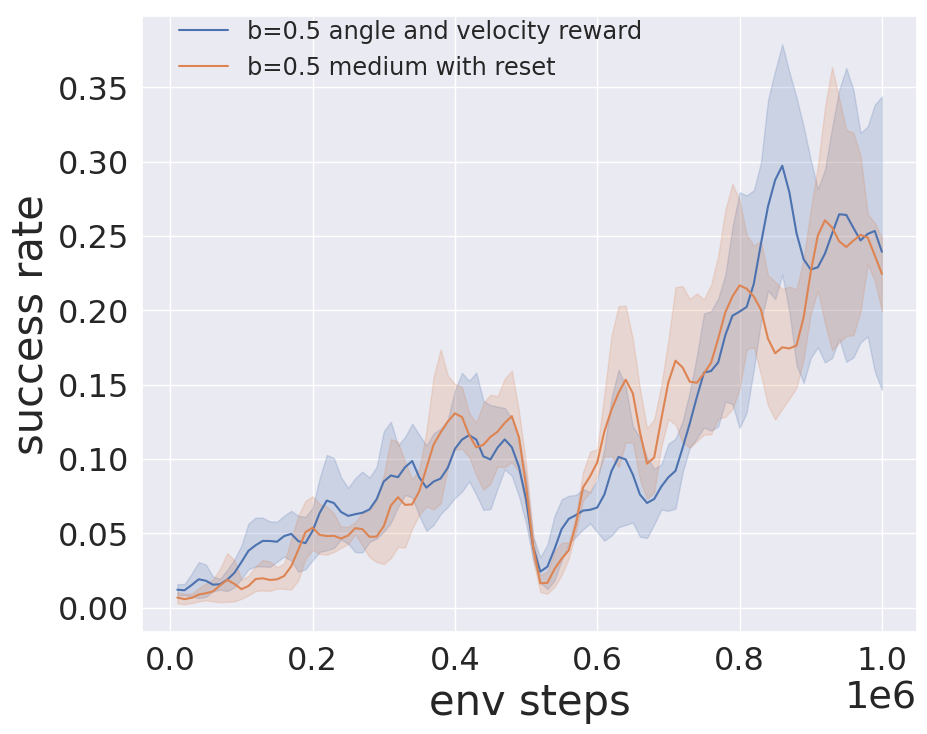

In [97]:
first_files = [
   "D2D/reward_devide/medium/b_05/sac_10hz_128_128_b_05_angle_only_medium_5e5steps_seed_1_singleRL",
   "D2D/reward_devide/medium/b_05/sac_10hz_128_128_b_05_angle_only_medium_5e5steps_seed_2_singleRL",
   "D2D/reward_devide/medium/b_05/sac_10hz_128_128_b_05_angle_only_medium_5e5steps_seed_3_singleRL",
   "D2D/reward_devide/medium/b_05/sac_10hz_128_128_b_05_angle_only_medium_5e5steps_seed_4_singleRL",
   "D2D/reward_devide/medium/b_05/sac_10hz_128_128_b_05_angle_only_medium_5e5steps_seed_5_singleRL",

]
second_files = [
    "D2D/reward_devide/medium/b_05/sac_10hz_128_128_b_05_angle_only_to_both_reward_medium_5e5steps_seed_1_singleRL", 
    "D2D/reward_devide/medium/b_05/sac_10hz_128_128_b_05_angle_only_to_both_reward_medium_5e5steps_seed_2_singleRL",  
    "D2D/reward_devide/medium/b_05/sac_10hz_128_128_b_05_angle_only_to_both_reward_medium_5e5steps_seed_3_singleRL", 
    "D2D/reward_devide/medium/b_05/sac_10hz_128_128_b_05_angle_only_to_both_reward_medium_5e5steps_seed_4_singleRL", 
    "D2D/reward_devide/medium/b_05/sac_10hz_128_128_b_05_angle_only_to_both_reward_medium_5e5steps_seed_5_singleRL",  
  
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b_05_angle_and_velocity_reward = pd.concat([load_two_stage_data("b=0.5 angle and velocity reward", first_filename,second_filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH,time_steps_add_to_sec_stage=500000).iloc[::] for first_filename, second_filename,seed_str in zip(first_files, second_files, seed_strs)])
print(len(df_b_05_angle_and_velocity_reward))


files = [
    "D2D/reward_devide/medium/b_05_only/sac_10hz_128_128_b_05_angle_only_medium_1e6steps_seed_1_singleRL", 
    "D2D/reward_devide/medium/b_05_only/sac_10hz_128_128_b_05_angle_only_medium_1e6steps_seed_2_singleRL", 
    "D2D/reward_devide/medium/b_05_only/sac_10hz_128_128_b_05_angle_only_medium_1e6steps_seed_3_singleRL", 
    "D2D/reward_devide/medium/b_05_only/sac_10hz_128_128_b_05_angle_only_medium_1e6steps_seed_4_singleRL", 
    "D2D/reward_devide/medium/b_05_only/sac_10hz_128_128_b_05_angle_only_medium_1e6steps_seed_5_singleRL", 
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b_05_angle_without_reset_reward  = pd.concat([load_data("b = 0.5_angle reward without_reset", filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_b_05_angle_without_reset_reward))

first_files = [
   "D2D/VVC/medium/baseline/two_stage_b_05_b_05/sac_10hz_128_128_b_05_5e5steps_seed_1_singleRL",
   "D2D/VVC/medium/baseline/two_stage_b_05_b_05/sac_10hz_128_128_b_05_5e5steps_seed_2_singleRL",
   "D2D/VVC/medium/baseline/two_stage_b_05_b_05/sac_10hz_128_128_b_05_5e5steps_seed_3_singleRL",
   "D2D/VVC/medium/baseline/two_stage_b_05_b_05/sac_10hz_128_128_b_05_5e5steps_seed_4_singleRL",
   "D2D/VVC/medium/baseline/two_stage_b_05_b_05/sac_10hz_128_128_b_05_5e5steps_seed_5_singleRL",

]
second_files = [
     "D2D/VVC/medium/baseline/two_stage_b_05_b_05/sac_10hz_128_128_b_05_5e5steps_b_05_5e5steps_seed_1_singleRL",
     "D2D/VVC/medium/baseline/two_stage_b_05_b_05/sac_10hz_128_128_b_05_5e5steps_b_05_5e5steps_seed_2_singleRL",
     "D2D/VVC/medium/baseline/two_stage_b_05_b_05/sac_10hz_128_128_b_05_5e5steps_b_05_5e5steps_seed_3_singleRL",
     "D2D/VVC/medium/baseline/two_stage_b_05_b_05/sac_10hz_128_128_b_05_5e5steps_b_05_5e5steps_seed_4_singleRL",
     "D2D/VVC/medium/baseline/two_stage_b_05_b_05/sac_10hz_128_128_b_05_5e5steps_b_05_5e5steps_seed_5_singleRL",

]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b_05_medium_with_reset = pd.concat([load_two_stage_data("b=0.5 medium with reset", first_filename,second_filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH,time_steps_add_to_sec_stage=500000).iloc[::] for first_filename, second_filename,seed_str in zip(first_files, second_files, seed_strs)])
print(len(df_b_05_medium_with_reset))

files = [
    "D2D/VVC/medium/b_05/sac_10hz_128_128_b_05_1e6steps_seed_1_singleRL", 
    "D2D/VVC/medium/b_05/sac_10hz_128_128_b_05_1e6steps_seed_2_singleRL",
    "D2D/VVC/medium/b_05/sac_10hz_128_128_b_05_1e6steps_seed_3_singleRL", 
    "D2D/VVC/medium/b_05/sac_10hz_128_128_b_05_1e6steps_seed_4_singleRL", 
    "D2D/VVC/medium/b_05/sac_10hz_128_128_b_05_1e6steps_seed_5_singleRL",  
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b_05_medium_without_reset = pd.concat([load_data("b=0.5 medium without reset", filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_b_05_medium_without_reset))

data_plot = pd.concat([
    df_b_05_angle_and_velocity_reward,
    #df_b_05_medium_without_reset,
    df_b_05_medium_with_reset,
    #df_b_05_angle_without_reset_reward
    ])

data_plot["eval/success_rate"] = data_plot["eval/success_rate"]
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.lineplot(x="time/total_timesteps", y="eval/success_rate", hue="algo", data=data_plot, ax=ax)

ax.tick_params(axis='both',labelsize=23)

ax.set_xlabel("env steps")
ax.set_ylabel("success rate")

# sns.move_legend(ax, "lower right", bbox_to_anchor=(.5, 0.98), ncol=7, title=None, frameon=False, fontsize="x-small") # "lower center"
sns.move_legend(ax, "upper left", bbox_to_anchor=(0.02, 1.03), ncol=1, title=None, frameon=False, fontsize="xx-small") # "lower center"

# E2D aug 4 

## E2D aug4 b = 1

250
500
100
500
500


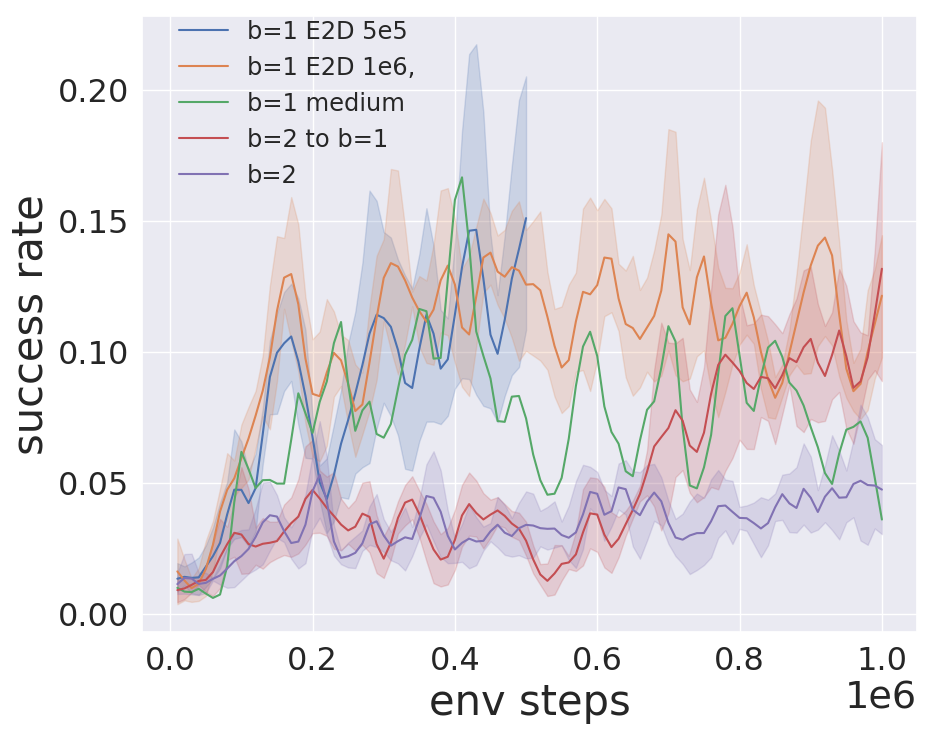

In [113]:
files = [
    "D2D/VVC/medium/sac/E2D_medium_b_1_aug4/sac_medium_10hz_128_128_b_1_5e5steps_seed_1_singleRL",
    "D2D/VVC/medium/sac/E2D_medium_b_1_aug4/sac_medium_10hz_128_128_b_1_5e5steps_seed_2_singleRL",
    "D2D/VVC/medium/sac/E2D_medium_b_1_aug4/sac_medium_10hz_128_128_b_1_5e5steps_seed_3_singleRL",
    "D2D/VVC/medium/sac/E2D_medium_b_1_aug4/sac_medium_10hz_128_128_b_1_5e5steps_seed_4_singleRL",
    "D2D/VVC/medium/sac/E2D_medium_b_1_aug4/sac_medium_10hz_128_128_b_1_5e5steps_seed_5_singleRL",

]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_E2D_b_1_medium_5e5 = pd.concat([load_data("b=1 E2D 5e5", filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_E2D_b_1_medium_5e5))


files = [
    "D2D/VVC/medium/sac/E2D_medium_b_1_aug4/sac_medium_10hz_128_128_b_1_1e6steps_seed_1_singleRL",
    "D2D/VVC/medium/sac/E2D_medium_b_1_aug4/sac_medium_10hz_128_128_b_1_1e6steps_seed_2_singleRL",
    "D2D/VVC/medium/sac/E2D_medium_b_1_aug4/sac_medium_10hz_128_128_b_1_1e6steps_seed_3_singleRL",
    "D2D/VVC/medium/sac/E2D_medium_b_1_aug4/sac_medium_10hz_128_128_b_1_1e6steps_seed_4_singleRL",
    "D2D/VVC/medium/sac/E2D_medium_b_1_aug4/sac_medium_10hz_128_128_b_1_1e6steps_seed_5_singleRL",

]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_E2D_b_1_medium_1e6 = pd.concat([load_data("b=1 E2D 1e6,", filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_E2D_b_1_medium_1e6))

files = [
    "D2D/VVC/medium/b_1/sac_10hz_128_128_b_1_1e6steps_seed_1_singleRL", 
    "D2D/VVC/medium/b_1/sac_10hz_128_128_b_1_1e6steps_seed_2_singleRL", 
    "D2D/VVC/medium/b_1/sac_10hz_128_128_b_1_1e6steps_seed_3_singleRL", 
    "D2D/VVC/medium/b_1/sac_10hz_128_128_b_1_1e6steps_seed_4_singleRL", 
    "D2D/VVC/medium/b_1/sac_10hz_128_128_b_1_1e6steps_seed_5_singleRL", 
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
],
df_E2D_b_1_medium_1e6,
df_b_1_medium = pd.concat([load_data("b=1 medium", filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_b_1_medium))


first_files = [
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_1_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_2_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_3_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_4_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_5_singleRL",
]
second_files = [
    "D2D/VVC/medium/two_stage_b_2_b_1/sac_10hz_128_128_b_2_5e5steps_b_1_5e5steps_seed_1_singleRL", 
    "D2D/VVC/medium/two_stage_b_2_b_1/sac_10hz_128_128_b_2_5e5steps_b_1_5e5steps_seed_2_singleRL", 
    "D2D/VVC/medium/two_stage_b_2_b_1/sac_10hz_128_128_b_2_5e5steps_b_1_5e5steps_seed_3_singleRL",
    "D2D/VVC/medium/two_stage_b_2_b_1/sac_10hz_128_128_b_2_5e5steps_b_1_5e5steps_seed_4_singleRL", 
    "D2D/VVC/medium/two_stage_b_2_b_1/sac_10hz_128_128_b_2_5e5steps_b_1_5e5steps_seed_5_singleRL",   
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_two_stage_b_2_b1 = pd.concat([load_two_stage_data("b=2 to b=1", first_filename,second_filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH,time_steps_add_to_sec_stage=500000).iloc[::] for first_filename, second_filename,seed_str in zip(first_files, second_files, seed_strs)])
print(len(df_two_stage_b_2_b1))



files = [
    "D2D/VVC/medium/b_2/sac_10hz_128_128_b_2_1e6steps_seed_1_singleRL", 
    "D2D/VVC/medium/b_2/sac_10hz_128_128_b_2_1e6steps_seed_2_singleRL", 
    "D2D/VVC/medium/b_2/sac_10hz_128_128_b_2_1e6steps_seed_3_singleRL",  
    "D2D/VVC/medium/b_2/sac_10hz_128_128_b_2_1e6steps_seed_4_singleRL", 
    "D2D/VVC/medium/b_2/sac_10hz_128_128_b_2_1e6steps_seed_5_singleRL", 
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b_2 = pd.concat([load_data("b=2", filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_b_2))


data_plot = pd.concat([
df_E2D_b_1_medium_5e5,
df_E2D_b_1_medium_1e6,
df_b_1_medium,
df_two_stage_b_2_b1,
df_b_2
    ])

data_plot["eval/success_rate"] = data_plot["eval/success_rate"]
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.lineplot(x="time/total_timesteps", y="eval/success_rate", hue="algo", data=data_plot, ax=ax)

ax.tick_params(axis='both',labelsize=23)

ax.set_xlabel("env steps")
ax.set_ylabel("success rate")

# sns.move_legend(ax, "lower right", bbox_to_anchor=(.5, 0.98), ncol=7, title=None, frameon=False, fontsize="x-small") # "lower center"
sns.move_legend(ax, "upper left", bbox_to_anchor=(0.02, 1.03), ncol=1, title=None, frameon=False, fontsize="xx-small") # "lower center"



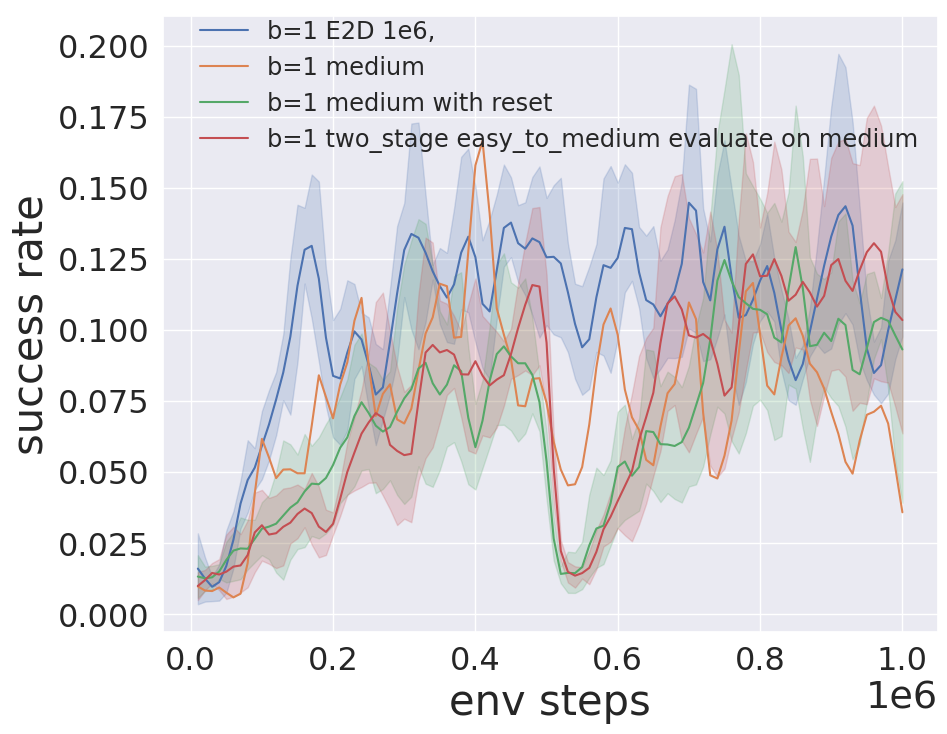

In [116]:
data_plot = pd.concat([
#df_E2D_b_1_medium_5e5,
df_E2D_b_1_medium_1e6,
df_b_1_medium,
df_b_1_medium_with_reset,
df_b_1_two_stage_easy_to_medium_evaluate_on_medium
    ])

data_plot["eval/success_rate"] = data_plot["eval/success_rate"]
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.lineplot(x="time/total_timesteps", y="eval/success_rate", hue="algo", data=data_plot, ax=ax)

ax.tick_params(axis='both',labelsize=23)

ax.set_xlabel("env steps")
ax.set_ylabel("success rate")

# sns.move_legend(ax, "lower right", bbox_to_anchor=(.5, 0.98), ncol=7, title=None, frameon=False, fontsize="x-small") # "lower center"
sns.move_legend(ax, "upper left", bbox_to_anchor=(0.02, 1.03), ncol=1, title=None, frameon=False, fontsize="xx-small") # "lower center"

## E2D aug4 b = 0.5

250
500
500
500
500


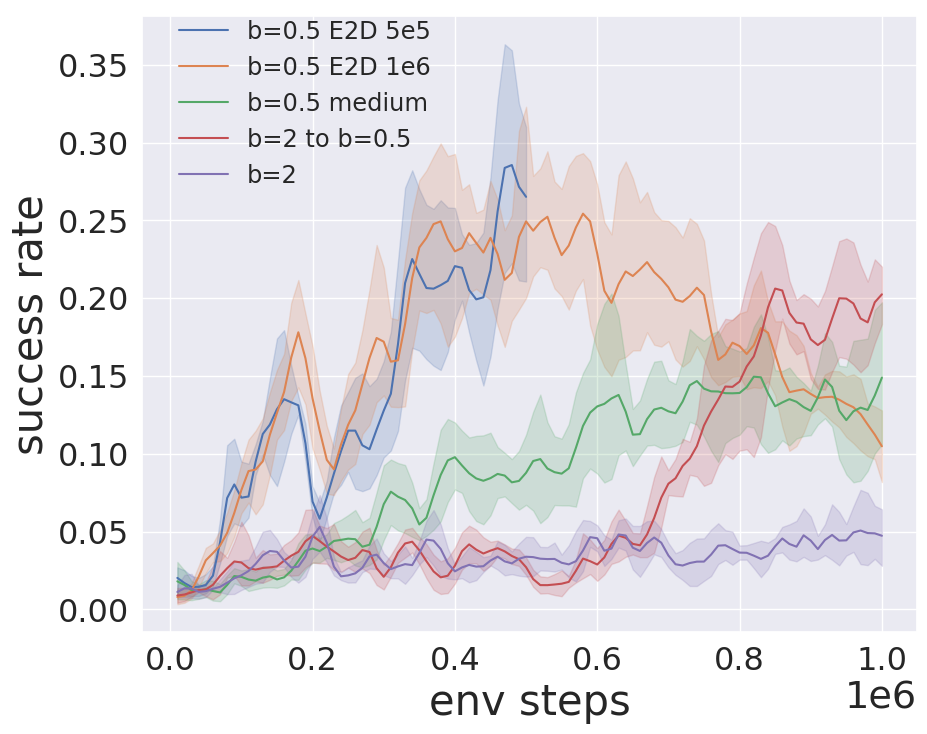

In [99]:
files = [
    "D2D/VVC/medium/sac/E2D_medium_b_05_aug4/sac_medium_10hz_128_128_b_05_5e5steps_seed_1_singleRL",
    "D2D/VVC/medium/sac/E2D_medium_b_05_aug4/sac_medium_10hz_128_128_b_05_5e5steps_seed_2_singleRL",
    "D2D/VVC/medium/sac/E2D_medium_b_05_aug4/sac_medium_10hz_128_128_b_05_5e5steps_seed_3_singleRL",
    "D2D/VVC/medium/sac/E2D_medium_b_05_aug4/sac_medium_10hz_128_128_b_05_5e5steps_seed_4_singleRL",
    "D2D/VVC/medium/sac/E2D_medium_b_05_aug4/sac_medium_10hz_128_128_b_05_5e5steps_seed_5_singleRL",


]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_E2D_b_05_medium_5e5 = pd.concat([load_data("b=0.5 E2D 5e5", filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_E2D_b_05_medium_5e5))

files = [
    "D2D/VVC/medium/sac/E2D_medium_b_05_aug4/sac_medium_10hz_128_128_b_05_1e6steps_seed_1_singleRL",
    "D2D/VVC/medium/sac/E2D_medium_b_05_aug4/sac_medium_10hz_128_128_b_05_1e6steps_seed_2_singleRL",
    "D2D/VVC/medium/sac/E2D_medium_b_05_aug4/sac_medium_10hz_128_128_b_05_1e6steps_seed_3_singleRL",
    "D2D/VVC/medium/sac/E2D_medium_b_05_aug4/sac_medium_10hz_128_128_b_05_1e6steps_seed_4_singleRL",
    "D2D/VVC/medium/sac/E2D_medium_b_05_aug4/sac_medium_10hz_128_128_b_05_1e6steps_seed_5_singleRL",
data_plot = pd.concat([
df_E2D_b_05_medium_5e5,
df_E2D_b_05_medium_1e6,
df_b_05medium,
df_two_stage_b_2_b05,
df_b_2
    ])

data_plot["eval/success_rate"] = data_plot["eval/success_rate"]
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.lineplot(x="time/total_timesteps", y="eval/success_rate", hue="algo", data=data_plot, ax=ax)

ax.tick_params(axis='both',labelsize=23)

ax.set_xlabel("env steps")
ax.set_ylabel("success rate")

# sns.move_legend(ax, "lower right", bbox_to_anchor=(.5, 0.98), ncol=7, title=None, frameon=False, fontsize="x-small") # "lower center"
sns.move_legend(ax, "upper left", bbox_to_anchor=(0.02, 1.03), ncol=1, title=None, frameon=False, fontsize="xx-small") # "lower center"
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_E2D_b_05_medium_1e6 = pd.concat([load_data("b=0.5 E2D 1e6", filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_E2D_b_05_medium_1e6))





files = [
    "D2D/VVC/medium/b_05/sac_10hz_128_128_b_05_1e6steps_seed_1_singleRL", 
    "D2D/VVC/medium/b_05/sac_10hz_128_128_b_05_1e6steps_seed_2_singleRL",
    "D2D/VVC/medium/b_05/sac_10hz_128_128_b_05_1e6steps_seed_3_singleRL", 
    "D2D/VVC/medium/b_05/sac_10hz_128_128_b_05_1e6steps_seed_4_singleRL", 
    "D2D/VVC/medium/b_05/sac_10hz_128_128_b_05_1e6steps_seed_5_singleRL",  
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b_05medium = pd.concat([load_data("b=0.5 medium", filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_b_05medium))


first_files = [
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_1_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_2_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_3_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_4_singleRL",
   "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_seed_5_singleRL",
]
second_files = [
    "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_b_05_5e5steps_seed_1_singleRL", 
    "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_b_05_5e5steps_seed_2_singleRL",
    "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_b_05_5e5steps_seed_3_singleRLdf_E2D_b_05_medium_5e5", 
    "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_b_05_5e5steps_seed_4_singleRL", 
    "D2D/VVC/medium/two_stage_b_2_b_05/sac_10hz_128_128_b_2_5e5steps_b_05_5e5steps_seed_5_singleRL",  
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_two_stage_b_2_b05 = pd.concat([load_two_stage_data("b=2 to b=0.5", first_filename,second_filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH,time_steps_add_to_sec_stage=500000).iloc[::] for first_filename, second_filename,seed_str in zip(first_files, second_files, seed_strs)])
print(len(df_two_stage_b_2_b05))


files = [
    "D2D/VVC/medium/b_2/sac_10hz_128_128_b_2_1e6steps_seed_1_singleRL", 
    "D2D/VVC/medium/b_2/sac_10hz_128_128_b_2_1e6steps_seed_2_singleRL", 
    "D2D/VVC/medium/b_2/sac_10hz_128_128_b_2_1e6steps_seed_3_singleRL",  
    "D2D/VVC/medium/b_2/sac_10hz_128_128_b_2_1e6steps_seed_4_singleRL", 
    "D2D/VVC/medium/b_2/sac_10hz_128_128_b_2_1e6steps_seed_5_singleRL", 
]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b_2 = pd.concat([load_data("b=2", filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_b_2))


data_plot = pd.concat([
df_E2D_b_05_medium_5e5,
df_E2D_b_05_medium_1e6,
df_b_05medium,
df_two_stage_b_2_b05,
df_b_2
    ])

data_plot["eval/success_rate"] = data_plot["eval/success_rate"]
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.lineplot(x="time/total_timesteps", y="eval/success_rate", hue="algo", data=data_plot, ax=ax)

ax.tick_params(axis='both',labelsize=23)

ax.set_xlabel("env steps")
ax.set_ylabel("success rate")

# sns.move_legend(ax, "lower right", bbox_to_anchor=(.5, 0.98), ncol=7, title=None, frameon=False, fontsize="x-small") # "lower center"
sns.move_legend(ax, "upper left", bbox_to_anchor=(0.02, 1.03), ncol=1, title=None, frameon=False, fontsize="xx-small") # "lower center"

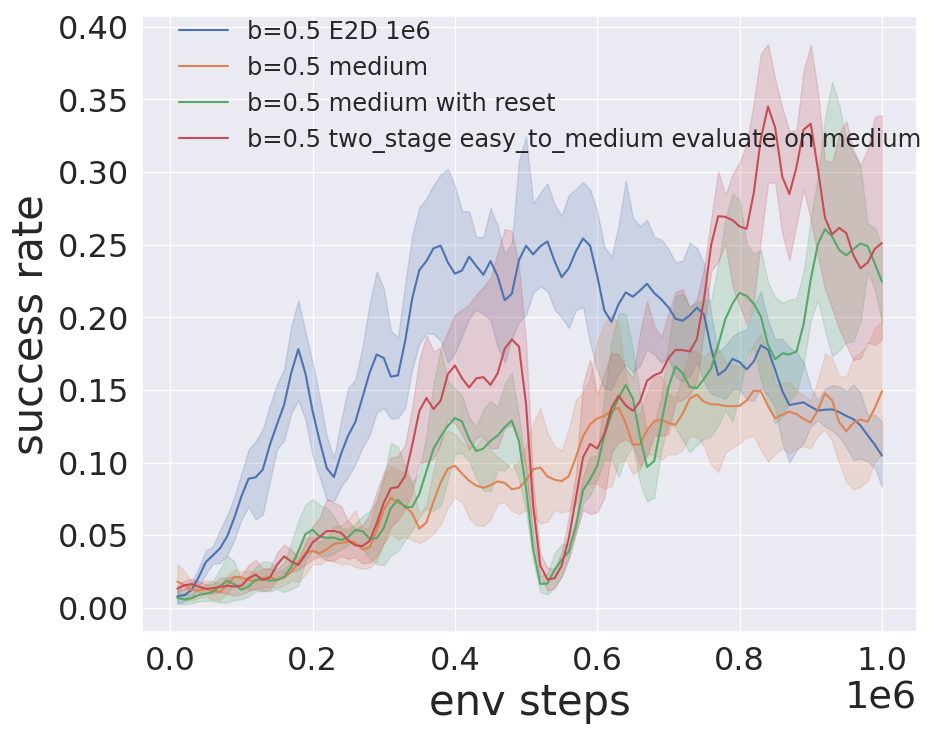

In [117]:
data_plot = pd.concat([
# df_E2D_b_05_medium_5e5,
df_E2D_b_05_medium_1e6,
df_b_05medium,
df_b_05_medium_with_reset,
df_b_05_two_stage_easy_to_medium_evaluate_on_medium

    ])

data_plot["eval/success_rate"] = data_plot["eval/success_rate"]
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.lineplot(x="time/total_timesteps", y="eval/success_rate", hue="algo", data=data_plot, ax=ax)

ax.tick_params(axis='both',labelsize=23)

ax.set_xlabel("env steps")
ax.set_ylabel("success rate")

# sns.move_legend(ax, "lower right", bbox_to_anchor=(.5, 0.98), ncol=7, title=None, frameon=False, fontsize="x-small") # "lower center"
sns.move_legend(ax, "upper left", bbox_to_anchor=(0.02, 1.03), ncol=1, title=None, frameon=False, fontsize="xx-small") # "lower center"

## reward devide 

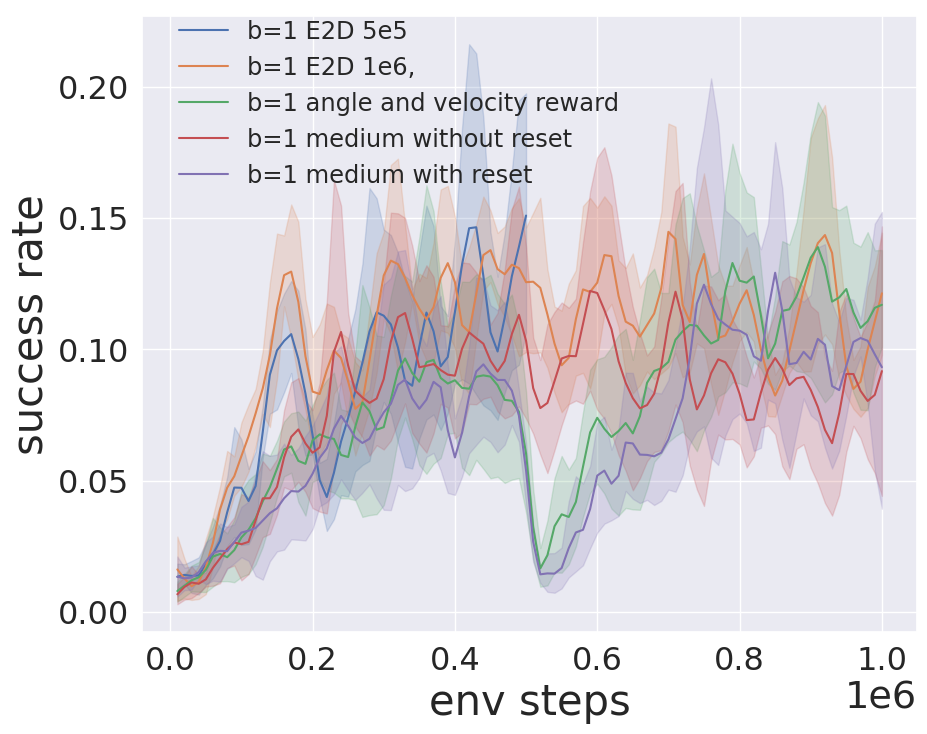

In [121]:
data_plot = pd.concat([
df_E2D_b_1_medium_5e5,
df_E2D_b_1_medium_1e6,
df_b_1_angle_and_velocity_reward,
df_b_1_medium_without_reset,
df_b_1_medium_with_reset

    ])

data_plot["eval/success_rate"] = data_plot["eval/success_rate"]
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.lineplot(x="time/total_timesteps", y="eval/success_rate", hue="algo", data=data_plot, ax=ax)

ax.tick_params(axis='both',labelsize=23)

ax.set_xlabel("env steps")
ax.set_ylabel("success rate")

# sns.move_legend(ax, "lower right", bbox_to_anchor=(.5, 0.98), ncol=7, title=None, frameon=False, fontsize="x-small") # "lower center"
sns.move_legend(ax, "upper left", bbox_to_anchor=(0.02, 1.03), ncol=1, title=None, frameon=False, fontsize="xx-small") # "lower center"

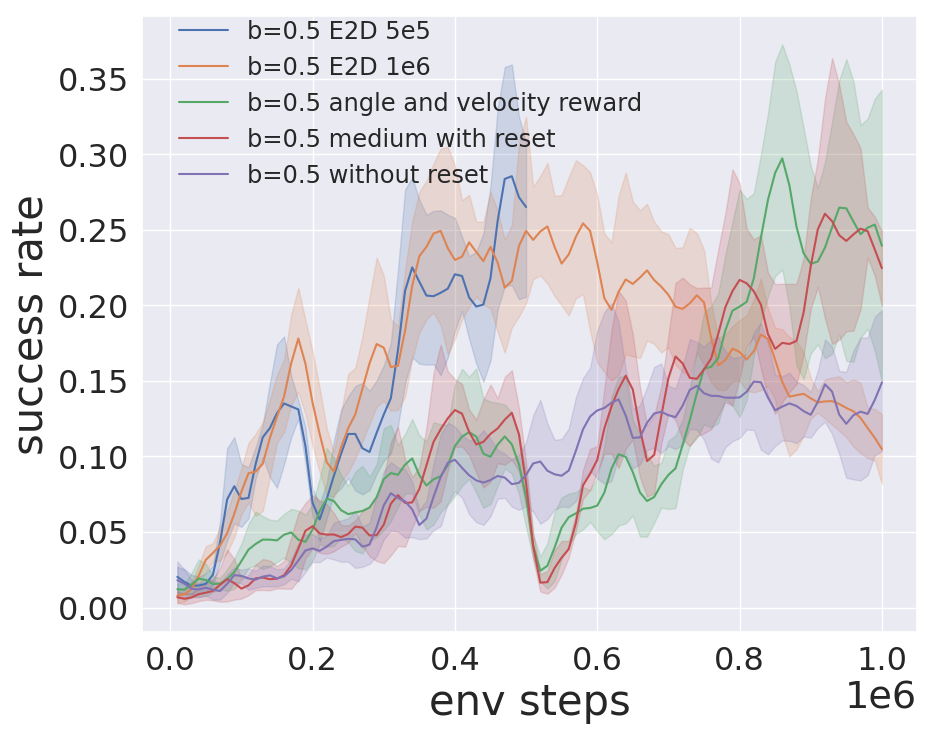

In [120]:
data_plot = pd.concat([
df_E2D_b_05_medium_5e5,
df_E2D_b_05_medium_1e6,
df_b_05_angle_and_velocity_reward,
df_b_05_medium_with_reset,
df_b_05_without_reset

    ])

data_plot["eval/success_rate"] = data_plot["eval/success_rate"]
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.lineplot(x="time/total_timesteps", y="eval/success_rate", hue="algo", data=data_plot, ax=ax)

ax.tick_params(axis='both',labelsize=23)

ax.set_xlabel("env steps")
ax.set_ylabel("success rate")

# sns.move_legend(ax, "lower right", bbox_to_anchor=(.5, 0.98), ncol=7, title=None, frameon=False, fontsize="x-small") # "lower center"
sns.move_legend(ax, "upper left", bbox_to_anchor=(0.02, 1.03), ncol=1, title=None, frameon=False, fontsize="xx-small") # "lower center"

# F2F

## skip 3

In [105]:
files = [
    "D2D/F2F/medium/b_1/skip_3/sac_128_128_b_1_1e6steps_skip_3_seed_1_singleRL", 
    "D2D/F2F/medium/b_1/skip_3/sac_128_128_b_1_1e6steps_skip_3_seed_2_singleRL", 
    "D2D/F2F/medium/b_1/skip_3/sac_128_128_b_1_1e6steps_skip_3_seed_3_singleRL", 
    "D2D/F2F/medium/b_1/skip_3/sac_128_128_b_1_1e6steps_skip_3_seed_4_singleRL", 
    "D2D/F2F/medium/b_1/skip_3/sac_128_128_b_1_1e6steps_skip_3_seed_5_singleRL", 

]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b_1_skip_3 = pd.concat([load_data("b=1 skip 3", filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_b_1_skip_3))


500


# skip 5

In [106]:
files = [
    "D2D/F2F/medium/b_1/skip_5/sac_128_128_b_1_1e6steps_skip_5_seed_1_singleRL",
    "D2D/F2F/medium/b_1/skip_5/sac_128_128_b_1_1e6steps_skip_5_seed_2_singleRL", 
    "D2D/F2F/medium/b_1/skip_5/sac_128_128_b_1_1e6steps_skip_5_seed_3_singleRL", 
    "D2D/F2F/medium/b_1/skip_5/sac_128_128_b_1_1e6steps_skip_5_seed_4_singleRL", 
    "D2D/F2F/medium/b_1/skip_5/sac_128_128_b_1_1e6steps_skip_5_seed_5_singleRL",  


]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_b_1_skip_5 = pd.concat([load_data("b=1 skip 5", filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH).iloc[::] for filename, seed_str in zip(files, seed_strs)])
print(len(df_b_1_skip_5))


500


# skip 3 to skip 3

In [108]:
first_files = [
   "D2D/F2F/medium/b_1/skip_3_2_skip_3/sac_128_128_b_1_5e5steps_skip_3_seed_1_singleRL",
   "D2D/F2F/medium/b_1/skip_3_2_skip_3/sac_128_128_b_1_5e5steps_skip_3_seed_2_singleRL",
   "D2D/F2F/medium/b_1/skip_3_2_skip_3/sac_128_128_b_1_5e5steps_skip_3_seed_3_singleRL",
   "D2D/F2F/medium/b_1/skip_3_2_skip_3/sac_128_128_b_1_5e5steps_skip_3_seed_4_singleRL",
   "D2D/F2F/medium/b_1/skip_3_2_skip_3/sac_128_128_b_1_5e5steps_skip_3_seed_5_singleRL",

]
second_files = [
    "D2D/F2F/medium/b_1/skip_3_2_skip_3/sac_128_128_b_1_5e5steps_skip_3_to_skip_3_seed_1_singleRL",
    "D2D/F2F/medium/b_1/skip_3_2_skip_3/sac_128_128_b_1_5e5steps_skip_3_to_skip_3_seed_2_singleRL", 
    "D2D/F2F/medium/b_1/skip_3_2_skip_3/sac_128_128_b_1_5e5steps_skip_3_to_skip_3_seed_3_singleRL", 
    "D2D/F2F/medium/b_1/skip_3_2_skip_3/sac_128_128_b_1_5e5steps_skip_3_to_skip_3_seed_4_singleRL", 
    "D2D/F2F/medium/b_1/skip_3_2_skip_3/sac_128_128_b_1_5e5steps_skip_3_to_skip_3_seed_5_singleRL", 

]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_two_stage_b_1_skip3_skip3 = pd.concat([load_two_stage_data("b=1 skip3 to skip3", first_filename,second_filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH,time_steps_add_to_sec_stage=500000).iloc[::] for first_filename, second_filename,seed_str in zip(first_files, second_files, seed_strs)])
print(len(df_two_stage_b_1_skip3_skip3))

500


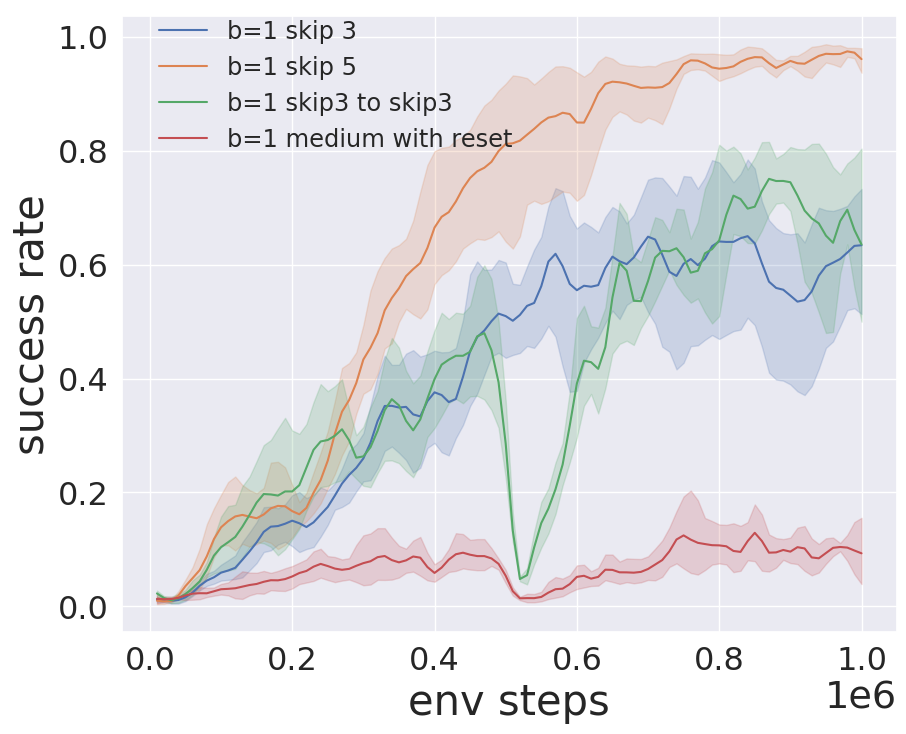

In [111]:

data_plot = pd.concat([
df_b_1_skip_3,
df_b_1_skip_5,
df_two_stage_b_1_skip3_skip3,
df_b_1_medium_with_reset
    ])

data_plot["eval/success_rate"] = data_plot["eval/success_rate"]
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.lineplot(x="time/total_timesteps", y="eval/success_rate", hue="algo", data=data_plot, ax=ax)

ax.tick_params(axis='both',labelsize=23)

ax.set_xlabel("env steps")
ax.set_ylabel("success rate")

# sns.move_legend(ax, "lower right", bbox_to_anchor=(.5, 0.98), ncol=7, title=None, frameon=False, fontsize="x-small") # "lower center"
sns.move_legend(ax, "upper left", bbox_to_anchor=(0.02, 1.03), ncol=1, title=None, frameon=False, fontsize="xx-small") # "lower center"

## gamma 0.95 to 0.995

500


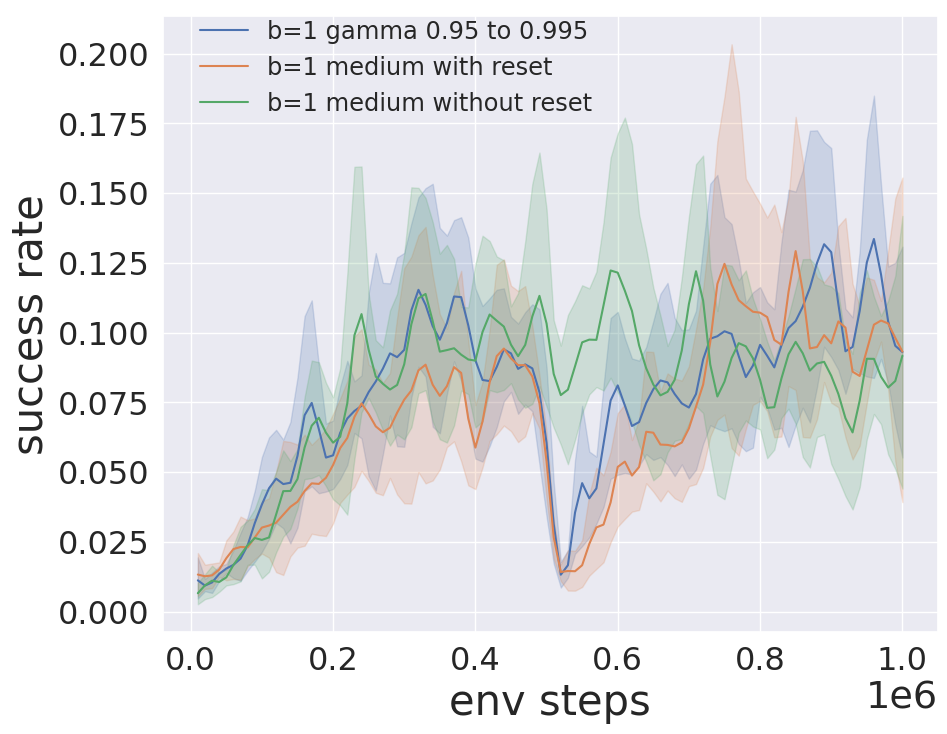

In [123]:
first_files = [
   "D2D/VVC/medium/baseline/two_stage_b_1_b_1/gamma095to0995/sac_10hz_128_128_b_1_5e5steps_seed_1_singleRL",
   "D2D/VVC/medium/baseline/two_stage_b_1_b_1/gamma095to0995/sac_10hz_128_128_b_1_5e5steps_seed_2_singleRL",
   "D2D/VVC/medium/baseline/two_stage_b_1_b_1/gamma095to0995/sac_10hz_128_128_b_1_5e5steps_seed_3_singleRL",
   "D2D/VVC/medium/baseline/two_stage_b_1_b_1/gamma095to0995/sac_10hz_128_128_b_1_5e5steps_seed_4_singleRL",
   "D2D/VVC/medium/baseline/two_stage_b_1_b_1/gamma095to0995/sac_10hz_128_128_b_1_5e5steps_seed_5_singleRL",

]
second_files = [
    "D2D/VVC/medium/baseline/two_stage_b_1_b_1/gamma095to0995/sac_10hz_128_128_b_1_5e5steps_b_1_5e5steps_seed_1_singleRL",
    "D2D/VVC/medium/baseline/two_stage_b_1_b_1/gamma095to0995/sac_10hz_128_128_b_1_5e5steps_b_1_5e5steps_seed_2_singleRL",
    "D2D/VVC/medium/baseline/two_stage_b_1_b_1/gamma095to0995/sac_10hz_128_128_b_1_5e5steps_b_1_5e5steps_seed_3_singleRL",
    "D2D/VVC/medium/baseline/two_stage_b_1_b_1/gamma095to0995/sac_10hz_128_128_b_1_5e5steps_b_1_5e5steps_seed_4_singleRL",
    "D2D/VVC/medium/baseline/two_stage_b_1_b_1/gamma095to0995/sac_10hz_128_128_b_1_5e5steps_b_1_5e5steps_seed_5_singleRL",

]
seed_strs = [
    "seed 1", 
    "seed 2", 
    "seed 3", 
    "seed 4", 
    "seed 5"
]
df_two_stage_b_1_gamma095to0995 = pd.concat([load_two_stage_data("b=1 gamma 0.95 to 0.995", first_filename,second_filename, seed_str, insert_no=14, algo_dir="", smooth_success_rate=SMOOTH,time_steps_add_to_sec_stage=500000).iloc[::] for first_filename, second_filename,seed_str in zip(first_files, second_files, seed_strs)])
print(len(df_two_stage_b_1_gamma095to0995))


data_plot = pd.concat([
df_two_stage_b_1_gamma095to0995,
df_b_1_medium_with_reset,
df_b_1_medium_without_reset
    ])

data_plot["eval/success_rate"] = data_plot["eval/success_rate"]
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.lineplot(x="time/total_timesteps", y="eval/success_rate", hue="algo", data=data_plot, ax=ax)

ax.tick_params(axis='both',labelsize=23)

ax.set_xlabel("env steps")
ax.set_ylabel("success rate")

# sns.move_legend(ax, "lower right", bbox_to_anchor=(.5, 0.98), ncol=7, title=None, frameon=False, fontsize="x-small") # "lower center"
sns.move_legend(ax, "upper left", bbox_to_anchor=(0.02, 1.03), ncol=1, title=None, frameon=False, fontsize="xx-small") # "lower center"